<a href="https://colab.research.google.com/github/mahata-lab/Tungsten-Ductile-Brittle-Temperature/blob/main/Ductility_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Analysis

In [1]:
!wget https://raw.githubusercontent.com/mahata-lab/Tungsten-Ductile-Brittle-Temperature/main/Created_Datasets/WHEA_ROM_parameters.csv

--2025-12-09 21:44:55--  https://raw.githubusercontent.com/mahata-lab/Tungsten-Ductile-Brittle-Temperature/main/Created_Datasets/WHEA_ROM_parameters.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40855 (40K) [text/plain]
Saving to: ‘WHEA_ROM_parameters.csv’

WHEA_ROM_parameters 100%[===================>]  39.90K  --.-KB/s    in 0.003s  

2025-12-09 21:44:55 (11.2 MB/s) - ‘WHEA_ROM_parameters.csv’ saved [40855/40855]



In [2]:
import pandas as pd

data = pd.read_csv('/content/WHEA_ROM_parameters.csv', index_col=0)
# columns that won't be used (duplicate or otherwise)
data.drop(columns = ['allen pairwise mismatch','bulk modulus R_AVG','youngs modulus R_AVG','poissons ratio R_AVG','shear modulus R_AVG'], inplace=True)

# make sure only not nans
# data = data[data.loc[:,'is_ductile'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 340 to 75
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   composition                87 non-null     object 
 1   is_ductile                 87 non-null     bool   
 2   Mo                         87 non-null     float64
 3   Nb                         87 non-null     float64
 4   Ta                         87 non-null     float64
 5   V                          87 non-null     float64
 6   W                          87 non-null     float64
 7   Cr                         87 non-null     float64
 8   Ti                         87 non-null     float64
 9   Al                         87 non-null     float64
 10  Co                         87 non-null     float64
 11  Fe                         87 non-null     float64
 12  Ni                         87 non-null     float64
 13  Re                         87 non-null     float64
 14 

## Dataset Analysis

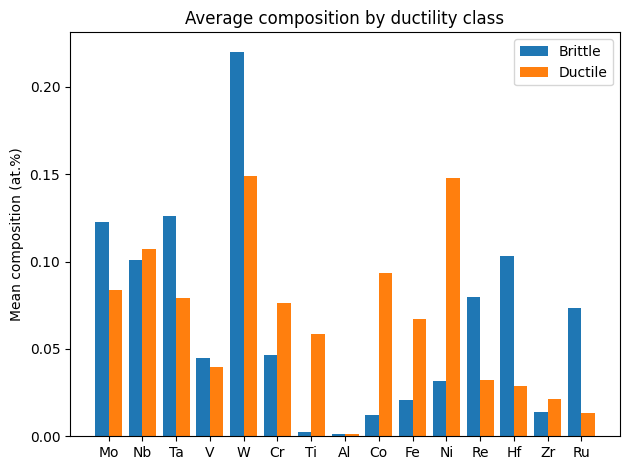

In [3]:
import matplotlib.pyplot as plt
import numpy as np

cols = data.columns[2:17]
means = data.groupby("is_ductile")[cols].mean().T  # transpose for plotting

x = np.arange(len(cols))
width = 0.4

plt.bar(x - width/2, means[False], width, label="Brittle")
plt.bar(x + width/2, means[True], width, label="Ductile")

plt.xticks(x, cols)
plt.ylabel("Mean composition (at.%)")
plt.title("Average composition by ductility class")
plt.legend()
plt.tight_layout()
plt.show()


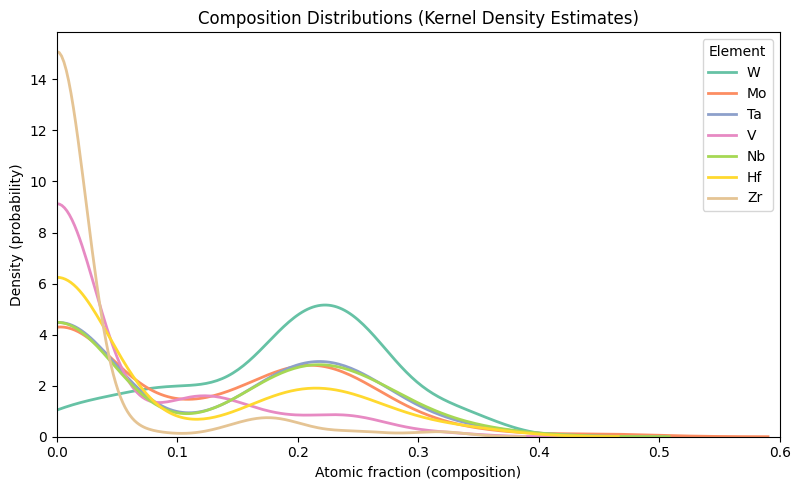

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

els = ["W", "Mo", "Ta", "V", "Nb",'Hf','Zr']
plt.figure(figsize=(8, 5))
for elem, color in zip(els,
                       sns.color_palette("Set2", len(els))):
    sns.kdeplot(
        data=data,
        x=elem,
        fill=False,
        clip=(0, 1),         # <-- restrict KDE domain
        label=elem,
        color=color,
        linewidth=2
    )

plt.legend(title="Element")
plt.xlabel("Atomic fraction (composition)")
plt.ylabel("Density (probability)")
plt.title("Composition Distributions (Kernel Density Estimates)")
plt.tight_layout()
plt.xlim(0, 0.6)
plt.show()


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

els = ["Cr", "Ti", "Co", "Fe","Ni"]
plt.figure(figsize=(8, 5))
for elem, color in zip(els,
                       sns.color_palette("Set3", len(els))):
    sns.kdeplot(
        data=data,
        x=elem,
        fill=False,
        clip=(0, 1),         # <-- restrict KDE domain
        label=elem,
        color=color,
        linewidth=2
    )

plt.legend(title="Element")
plt.xlabel("Atomic fraction (composition)")
plt.ylabel("Density (probability)")
plt.title("Composition Distributions (Kernel Density Estimates)")
plt.tight_layout()
plt.xlim(0, 0.6)
plt.show()

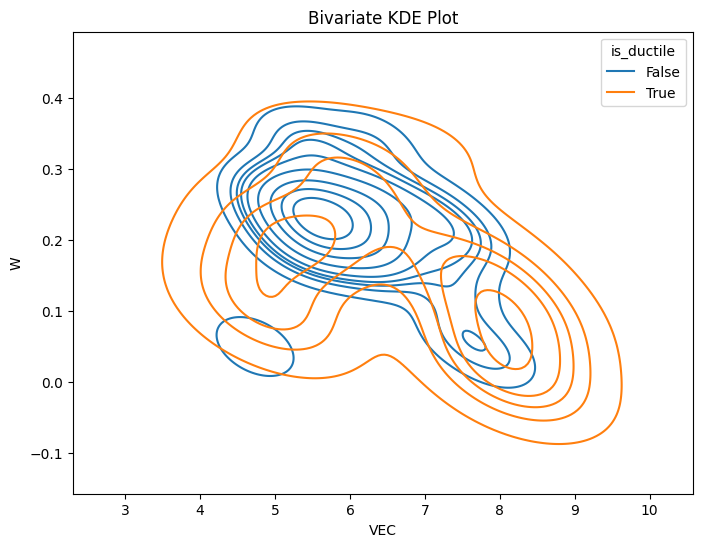

In [6]:
# Bivariate KDE plot of total_bill and tip, colored by time
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x="VEC", y="W", hue='is_ductile', fill=False)
plt.title("Bivariate KDE Plot")
plt.show()


## Creating Dataset

X = features, y = target (binary ductility class)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 340 to 75
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   composition                87 non-null     object 
 1   is_ductile                 87 non-null     bool   
 2   Mo                         87 non-null     float64
 3   Nb                         87 non-null     float64
 4   Ta                         87 non-null     float64
 5   V                          87 non-null     float64
 6   W                          87 non-null     float64
 7   Cr                         87 non-null     float64
 8   Ti                         87 non-null     float64
 9   Al                         87 non-null     float64
 10  Co                         87 non-null     float64
 11  Fe                         87 non-null     float64
 12  Ni                         87 non-null     float64
 13  Re                         87 non-null     float64
 14 

In [8]:
# ROM features
X = data.iloc[:,17:32]
# binary ductility classification
y = data.loc[:,'is_ductile'].astype(bool)

In [9]:
y.value_counts()

is_ductile
False    47
True     40
Name: count, dtype: int64

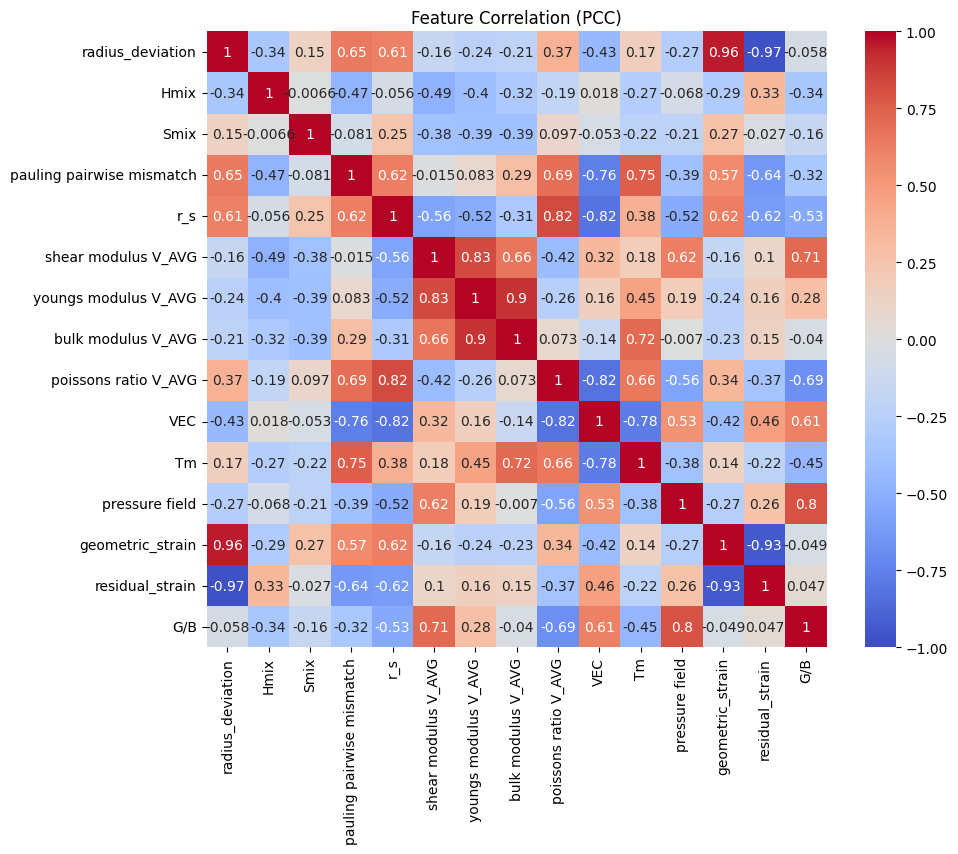

In [10]:
# look at correlation of features to reduce data size

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation (PCC)')
plt.show()

In [11]:
import numpy as np

def find_correlated_features(df, threshold=0.9):
    """
    Return a list of (feature_1, feature_2, correlation) tuples
    where |corr| > threshold.
    """
    corr = df.corr().abs()
    Ucorr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    corr_pairs = []
    for idx, row in Ucorr.iterrows():
        for col, val in row.items():
            if pd.notna(val) and val > threshold:
                corr_pairs.append((idx, col, val))

    return corr_pairs

find_correlated_features(X,threshold=0.85)


[('radius_deviation', 'geometric_strain', 0.9568281335723561),
 ('radius_deviation', 'residual_strain', 0.9735490689324086),
 ('youngs modulus V_AVG', 'bulk modulus V_AVG', 0.9005271292008876),
 ('geometric_strain', 'residual_strain', 0.9348532867636299)]

In [12]:
# choose what columns to drop based on validity of the rom calculation (interpretability and generality)
corr_col_drop = ['youngs modulus V_AVG','geometric_strain','residual_strain']

In [13]:
# set training set to uncorrelated values
X = X.drop(columns=corr_col_drop)


# Classification Models

## Model Selection

training, validation, metrics for 3 models

### Random Forest Classification

In [14]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix

# Define the base random forest
rf = RandomForestClassifier(
    criterion='gini',
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced' #important for our small, imbalanced dataset
)

# Define parameter grid for hyperparameter search
rf_params = {
    'n_estimators': [50, 100, 500],
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1, 3, 5]
}

# Define multiple scorers to examine class accuracy
scorers = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='binary', zero_division=0),
    'recall': make_scorer(recall_score, average='binary', zero_division=0),
    'f1': make_scorer(f1_score, average='binary', zero_division=0)
}

# Define CV splits
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Single pass through outer folds
fold_predictions = []
fold_true_labels = []

# outer_cv splits X (data) into 10 folds for validation of hyperparameter search
for train_idx, test_idx in outer_cv.split(X, y):

    X_train = X.iloc[train_idx] if hasattr(X, 'iloc') else X[train_idx]
    X_test = X.iloc[test_idx] if hasattr(X, 'iloc') else X[test_idx]
    y_train = y.iloc[train_idx] if hasattr(y, 'iloc') else y[train_idx]
    y_test = y.iloc[test_idx] if hasattr(y, 'iloc') else y[test_idx]

    # Setup GridSearchCV inside of loop using balanced accuracy (simplest for our dataset)
    rf_grid_search = GridSearchCV(
        rf,
        rf_params,
        cv=inner_cv, # 5 folds to do hyperparameter search, INNER model with best params chosen for OUTER validation
        scoring='f1',  # Metric used to select best hyperparameters
        n_jobs=-1,
        verbose=1,
        refit=True
    )

    # fit the best model, predict test data and append to lists
    rf_grid_search.fit(X_train, y_train)

    # get predictions of inner cv model to get per fold metrics
    y_pred = rf_grid_search.predict(X_test)

    fold_predictions.append(y_pred)
    fold_true_labels.append(y_test)


# Compute all metrics from fold predictions by computing scores using scorers above
rf_results = {metric: [] for metric in scorers.keys()}

for y_true, y_pred in zip(fold_true_labels, fold_predictions):
    for metric_name, scorer in scorers.items():
        score = scorer._score_func(y_true, y_pred)
        rf_results[metric_name].append(score)

# Convert to mean and std format
rf_results = {
    metric: {'mean': np.mean(scores), 'std': np.std(scores)}
    for metric, scores in rf_results.items()
}

# Display all results
print("\n=== Random Forest Nested CV Results ===")
for metric_name, result in rf_results.items():
    print(f"{metric_name.replace('_', ' ').title()}: {result['mean']:.4f} (+/- {result['std']:.4f})")

all_true = np.concatenate(fold_true_labels)
all_pred = np.concatenate(fold_predictions)
rf_agg_cm = confusion_matrix(all_true, all_pred)

print("\n=== Aggregated Confusion Matrix ===")
print(rf_agg_cm)
print(f"TN: {rf_agg_cm[0,0]}, FP: {rf_agg_cm[0,1]}")
print(f"FN: {rf_agg_cm[1,0]}, TP: {rf_agg_cm[1,1]}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits

=== Random Forest Nested CV Results ===
Balanced Accuracy: 0.8150 (+/- 0.0989)
Precision: 0.8705 (+/- 0.1668)
Recall: 0.7750 (+/- 0.2077)
F1: 0.7892 (+/- 0.1223)

=== Aggregated Confusion Matrix ===
[[40  7]
 [ 9 31]]
TN: 40, FP: 7
FN: 9, TP: 31


In [15]:
# Fit on all data to get best hyperparameters and final model

final_rf = GridSearchCV(
        rf,
        rf_params,
        cv=inner_cv,  # Inner CV
        scoring='f1',  # Metric used to select best hyperparameters
        n_jobs=-1,
        verbose=1,
        refit=True
    )

final_rf.fit(X, y)
best_rf = final_rf.best_estimator_
print("\nBest parameters:", final_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


#### INSPECTION

In [16]:
import shap

explainer = shap.TreeExplainer(best_rf)
ex = explainer(X)                      # ex.values: (n_samples, n_features, n_classes)

# pick class 1 (positive class)
shap.plots.violin(ex[:, :, 1])         # 2-D slice: (n_samples, n_features)


In [17]:
# impurity-based feature importance
import numpy as np

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,4))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(X.columns)[indices], rotation=45)
plt.ylabel("Feature importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [18]:
# permutation importance (how much the estimators rely on a feature to get correct classification)
# permutations may give a better idea of importance/weight since many of the features 'share importance'
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

from sklearn.inspection import permutation_importance

result = permutation_importance(best_rf, X, y, scoring='balanced_accuracy', n_repeats=30)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [19]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.inspection import permutation_importance

splits = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
importances = []

for train_idx, test_idx in splits.split(X):
    rf.fit(X.iloc[train_idx], y.iloc[train_idx])
    r = permutation_importance(rf, X.iloc[test_idx], y.iloc[test_idx])
    importances.append(r.importances_mean)

np.std(importances, axis=0)   # feature-wise instability


array([0.03830917, 0.02446338, 0.03342118, 0.04068852, 0.03331018,
       0.02852333, 0.03756065, 0.01589899, 0.03901171, 0.04035338,
       0.02863133, 0.02569407])

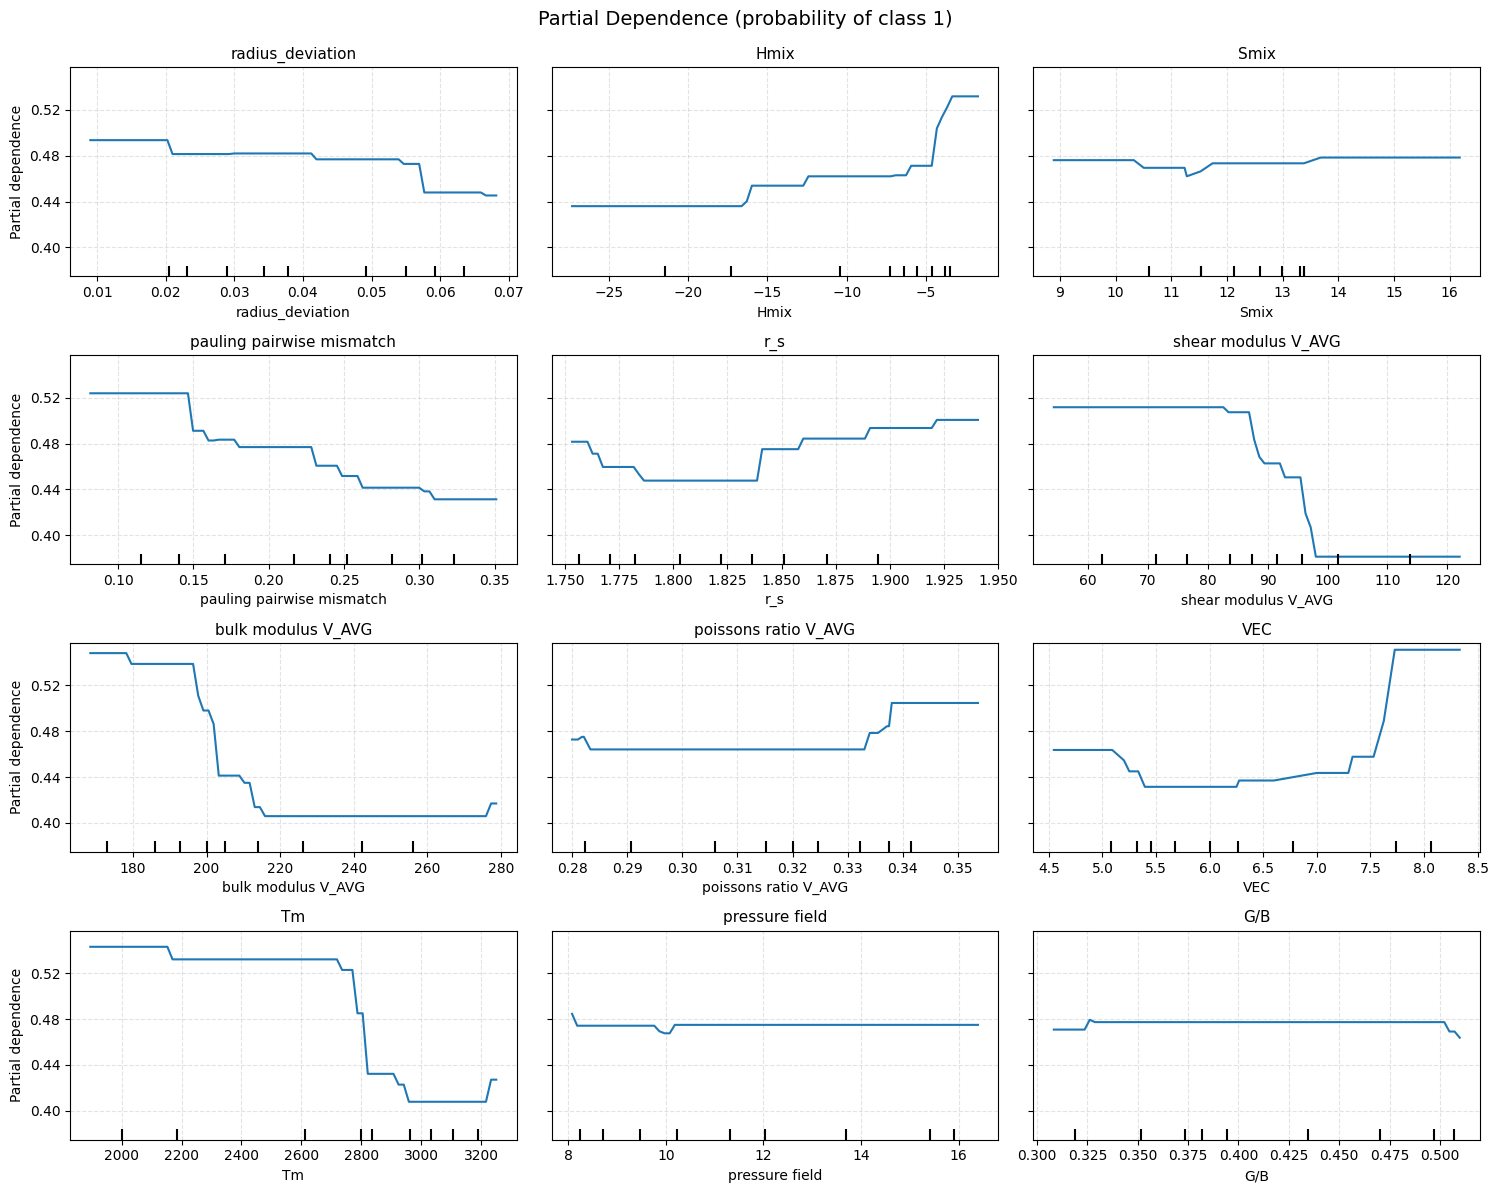

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.inspection import PartialDependenceDisplay

feats = list(X.columns)

# dynamically set number of rows and columns
ncols = 3
nrows = int(np.ceil(len(feats) / ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3*nrows), sharey=True)

disp = PartialDependenceDisplay.from_estimator(
    best_rf, X, feats,
    ax=ax,
    kind="average",
    grid_resolution=80,
    response_method="predict_proba",
    target=1,
    percentiles=(0.05, 0.95),
)

# format subplots
axes = disp.axes_.ravel()
for i, (a, f) in enumerate(zip(axes, feats)):
    a.set_title(f, fontsize=11)
    a.grid(True, axis='both', linestyle='--', alpha=0.35)
    a.yaxis.set_major_locator(mticker.MaxNLocator(5))
    a.yaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))
    if i % ncols != 0:  # remove redundant y-labels except first column
        a.set_ylabel("")

# remove any empty axes if len(feats) not divisible by ncols
for j in range(len(feats), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Partial Dependence (probability of class 1)", y=0.99, fontsize=14)
plt.tight_layout()
plt.show()




### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV

lr_params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1','l2'],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': [1000],
}

# Create pipeline with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

# Define multiple scorers
scorers = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='binary', zero_division=0),
    'recall': make_scorer(recall_score, average='binary', zero_division=0),
    'f1': make_scorer(f1_score, average='binary', zero_division=0)
}

# set up cv
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Single pass through outer folds
fold_predictions = []
fold_true_labels = []

# 10 folds of the data to loop through
for train_idx, test_idx in outer_cv.split(X, y):

    X_train = X.iloc[train_idx] if hasattr(X, 'iloc') else X[train_idx]
    X_test = X.iloc[test_idx] if hasattr(X, 'iloc') else X[test_idx]
    y_train = y.iloc[train_idx] if hasattr(y, 'iloc') else y[train_idx]
    y_test = y.iloc[test_idx] if hasattr(y, 'iloc') else y[test_idx]

    lr_grid_search = GridSearchCV(
        lr_pipeline,
        lr_params,
        cv=inner_cv,  # Inner CV, 5 folds
        scoring='f1',  # Metric used to select best hyperparameters
        n_jobs=-1,
        verbose=1,
        refit=True
        )

    lr_grid_search.fit(X_train, y_train)
    y_pred = lr_grid_search.predict(X_test)

    fold_predictions.append(y_pred)
    fold_true_labels.append(y_test)

# Compute all metrics from fold predictions
lr_results = {metric: [] for metric in scorers.keys()}

for y_true, y_pred in zip(fold_true_labels, fold_predictions):
    for metric_name, scorer in scorers.items():
        score = scorer._score_func(y_true, y_pred)
        lr_results[metric_name].append(score)

# Convert to mean and std format
lr_results = {
    metric: {'mean': np.mean(scores), 'std': np.std(scores)}
    for metric, scores in lr_results.items()
}

# Display all results
print("\n=== Logistic Regression Nested CV Results ===")
for metric_name, result in lr_results.items():
    print(f"{metric_name.replace('_', ' ').title()}: {result['mean']:.4f} (+/- {result['std']:.4f})")

all_true = np.concatenate(fold_true_labels)
all_pred = np.concatenate(fold_predictions)
lr_agg_cm = confusion_matrix(all_true, all_pred)

print("\n=== Aggregated Confusion Matrix ===")
print(lr_agg_cm)
print(f"TN: {lr_agg_cm[0,0]}, FP: {lr_agg_cm[0,1]}")
print(f"FN: {lr_agg_cm[1,0]}, TP: {lr_agg_cm[1,1]}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits

=== Logistic Regression Nested CV Results ===
Balanced Accuracy: 0.8075 (+/- 0.1360)
Precision: 0.7800 (+/- 0.1579)
Recall: 0.8250 (+/- 0.1953)
F1: 0.7911 (+/- 0.1544)

=== Aggregated Confusion Matrix ===
[[37 10]
 [ 7 33]]
TN: 37, FP: 10
FN: 7, TP: 33


In [22]:
# Fit on all data to get best hyperparameters and final model

final_lr = GridSearchCV(
        lr_pipeline,
        lr_params,
        cv=inner_cv,  # Inner CV
        scoring='f1',  # Metric used to select best hyperparameters
        n_jobs=-1,
        verbose=1,
        refit=True
        )
final_lr.fit(X, y)
best_lr = final_lr.best_estimator_
print("\nBest parameters:", final_lr.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


#### INSPECTION

In [23]:
import shap

best_lr = lr_grid_search.best_estimator_


# Extract the scaler and classifier from the pipeline
scaler = best_lr.named_steps['scaler']
classifier = best_lr.named_steps['classifier']

# Scale the data using the fitted scaler
X_scaled = scaler.transform(X)

# Create SHAP explainer with the classifier and scaled data
lr_explainer = shap.Explainer(classifier, X_scaled)
lr_shap_values = lr_explainer(X_scaled)

# Visualize SHAP values
shap.plots.violin(lr_shap_values, X_scaled, feature_names=X.columns if hasattr(X, 'columns') else None)

In [24]:
classifier = best_lr.named_steps['classifier']

# Get coefficients from the classifier (not the pipeline)
coefs = classifier.coef_.ravel()

odds = np.exp(coefs)
import pandas as pd
coef_df = pd.DataFrame({
    "feature": getattr(X, "columns", np.arange(len(coefs))),  # Use X, not X_s
    "coef": coefs,
    "odds_ratio": odds
}).sort_values("coef", ascending=False).set_index('feature')

print(coef_df)

                               coef   odds_ratio
feature                                         
bulk modulus V_AVG         9.130568  9233.266195
r_s                        8.518798  5008.031565
VEC                        3.036170    20.825331
pressure field             2.384957    10.858600
G/B                        2.372006    10.718871
Hmix                       1.145180     3.143006
Smix                       0.362303     1.436635
pauling pairwise mismatch  0.021603     1.021838
poissons ratio V_AVG      -0.089864     0.914055
radius_deviation          -2.291964     0.101068
Tm                        -5.185319     0.005598
shear modulus V_AVG       -5.272324     0.005132


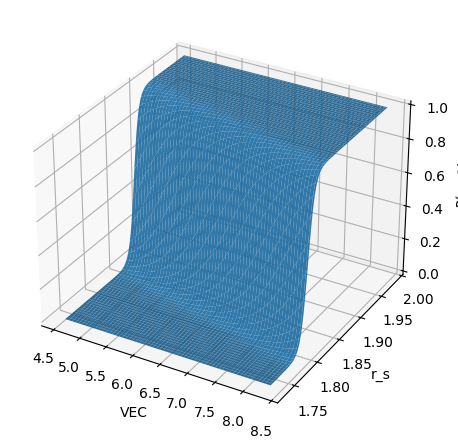

In [25]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def plot_3d_surface(clf, X, f1, f2, target=1):
    x1 = X[f1].to_numpy(); x2 = X[f2].to_numpy()
    g1 = np.linspace(x1.min(), x1.max(), 120)
    g2 = np.linspace(x2.min(), x2.max(), 120)
    xx, yy = np.meshgrid(g1, g2)

    ref = X.median(numeric_only=True).to_dict()
    Xref = pd.DataFrame({c: ref.get(c, 0) for c in X.columns}, index=np.arange(xx.size))
    Xref[f1] = xx.ravel(); Xref[f2] = yy.ravel()

    if hasattr(clf, "predict_proba"):
        Z = clf.predict_proba(Xref)[:, target].reshape(xx.shape)
    else:
        Z = 1/(1+np.exp(-clf.decision_function(Xref))).reshape(xx.shape)

    fig = plt.figure(figsize=(6,4.5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, rstride=2, cstride=2, alpha=0.9)
    ax.set_xlabel(f1); ax.set_ylabel(f2); ax.set_zlabel("P(y=1)")
    plt.tight_layout(); plt.show()

# usage:
plot_3d_surface(best_lr, X, "VEC", "r_s")

### Support Vector Classification

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
'''
svc_params = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}
'''

svc_params = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Create pipeline with scaling (REQUIRED for SVC)
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, class_weight='balanced'))
])

# Define multiple scorers
scorers = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision': make_scorer(precision_score, average='binary', zero_division=0),
    'recall': make_scorer(recall_score, average='binary', zero_division=0),
    'f1': make_scorer(f1_score, average='binary', zero_division=0)
}

# define inner/outer cv
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_predictions = []
fold_true_labels = []

for train_idx, test_idx in outer_cv.split(X, y):

    X_train = X.iloc[train_idx] if hasattr(X, 'iloc') else X[train_idx]
    X_test = X.iloc[test_idx] if hasattr(X, 'iloc') else X[test_idx]
    y_train = y.iloc[train_idx] if hasattr(y, 'iloc') else y[train_idx]
    y_test = y.iloc[test_idx] if hasattr(y, 'iloc') else y[test_idx]

    # Setup GridSearchCV - use one metric for hyperparameter selection
    svc_grid_search = GridSearchCV(
        svc_pipeline,
        svc_params,
        cv=inner_cv,  # Inner CV
        scoring='f1',  # Metric used to select best hyperparameters
        n_jobs=-1,
        verbose=1,
        refit=True
    )

    svc_grid_search.fit(X_train, y_train)
    y_pred = svc_grid_search.predict(X_test)

    fold_predictions.append(y_pred)
    fold_true_labels.append(y_test)

# Compute all metrics from fold predictions
svc_results = {metric: [] for metric in scorers.keys()}

for y_true, y_pred in zip(fold_true_labels, fold_predictions):
    for metric_name, scorer in scorers.items():
        score = scorer._score_func(y_true, y_pred)
        svc_results[metric_name].append(score)

# Convert to mean and std format
svc_results = {
    metric: {'mean': np.mean(scores), 'std': np.std(scores)}
    for metric, scores in svc_results.items()
}

# Display all results
print("\n=== SVC Nested CV Results ===")
for metric_name, result in svc_results.items():
    print(f"{metric_name.replace('_', ' ').title()}: {result['mean']:.4f} (+/- {result['std']:.4f})")


all_true = np.concatenate(fold_true_labels)
all_pred = np.concatenate(fold_predictions)
svc_agg_cm = confusion_matrix(all_true, all_pred)

print("\n=== Aggregated Confusion Matrix ===")
print(svc_agg_cm)
print(f"TN: {svc_agg_cm[0,0]}, FP: {svc_agg_cm[0,1]}")
print(f"FN: {svc_agg_cm[1,0]}, TP: {svc_agg_cm[1,1]}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits

=== SVC Nested CV Results ===
Balanced Accuracy: 0.8375 (+/- 0.1315)
Precision: 0.8650 (+/- 0.1817)
Recall: 0.8000 (+/- 0.1500)
F1: 0.8234 (+/- 0.1434)

=== Aggregated Confusion Matrix ===
[[41  6]
 [ 8 32]]
TN: 41, FP: 6
FN: 8, TP: 32


In [27]:
# Fit on all data to get best hyperparameters and final model

final_svc = GridSearchCV(
        svc_pipeline,
        svc_params,
        cv=inner_cv,  # Inner CV
        scoring='f1',  # Metric used to select best hyperparameters
        n_jobs=-1,
        verbose=1,
        refit=True
    )

final_svc.fit(X, y)
best_svc = final_svc.best_estimator_
print("\nBest parameters:", final_svc.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}


#### INSPECTION

  0%|          | 0/87 [00:00<?, ?it/s]

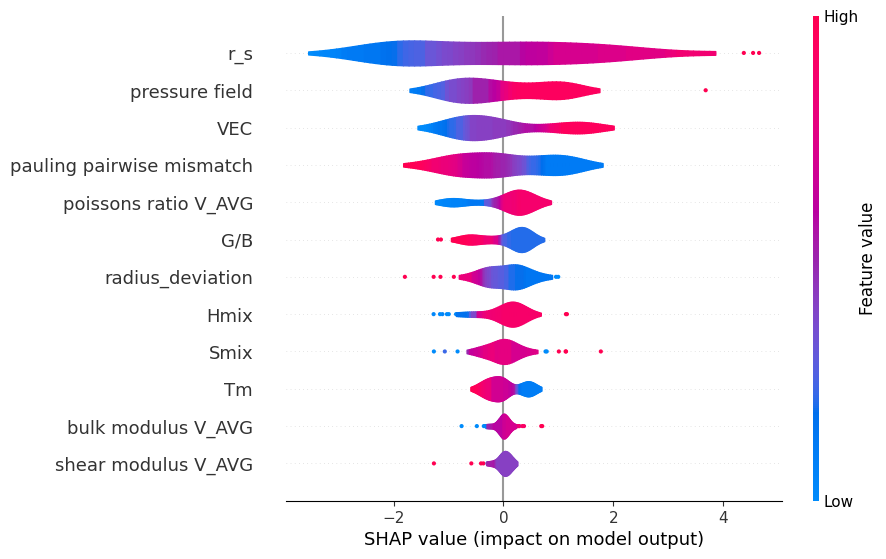

In [28]:
import shap

# Extract the scaler and classifier from the pipeline
scaler = best_svc.named_steps['scaler']
classifier = best_svc.named_steps['classifier']

# Scale the data using the fitted scaler
X_scaled = scaler.transform(X)

# Create a prediction function
def predict_fn(x):
    return classifier.decision_function(x)

# Create SHAP KernelExplainer for entire dataset (small)
svc_explainer = shap.KernelExplainer(predict_fn, X_scaled)

# Calculate SHAP values
svc_shap_values = svc_explainer.shap_values(X_scaled)

# Visualize SHAP values
feature_names = X.columns.tolist() if hasattr(X, 'columns') else None
shap.plots.violin(svc_shap_values, X_scaled, feature_names=feature_names)

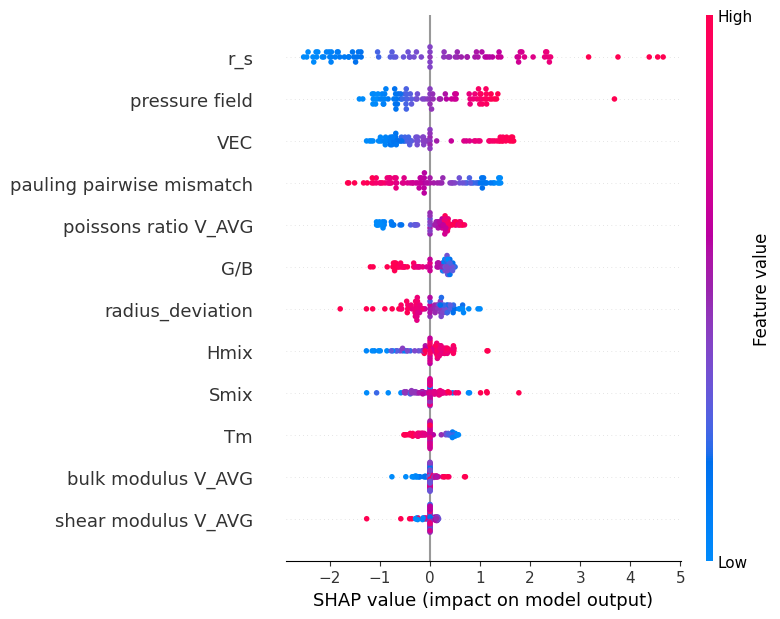

In [114]:
import shap
import matplotlib.pyplot as plt

# Create summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(
    svc_shap_values,
    X,  # Use original scale
    feature_names=feature_names,
    plot_type="dot",  # or "violin"
    show=False
)
plt.tight_layout()
plt.savefig('shap_summary_beeswarm.png', dpi=600, bbox_inches='tight')
plt.show()

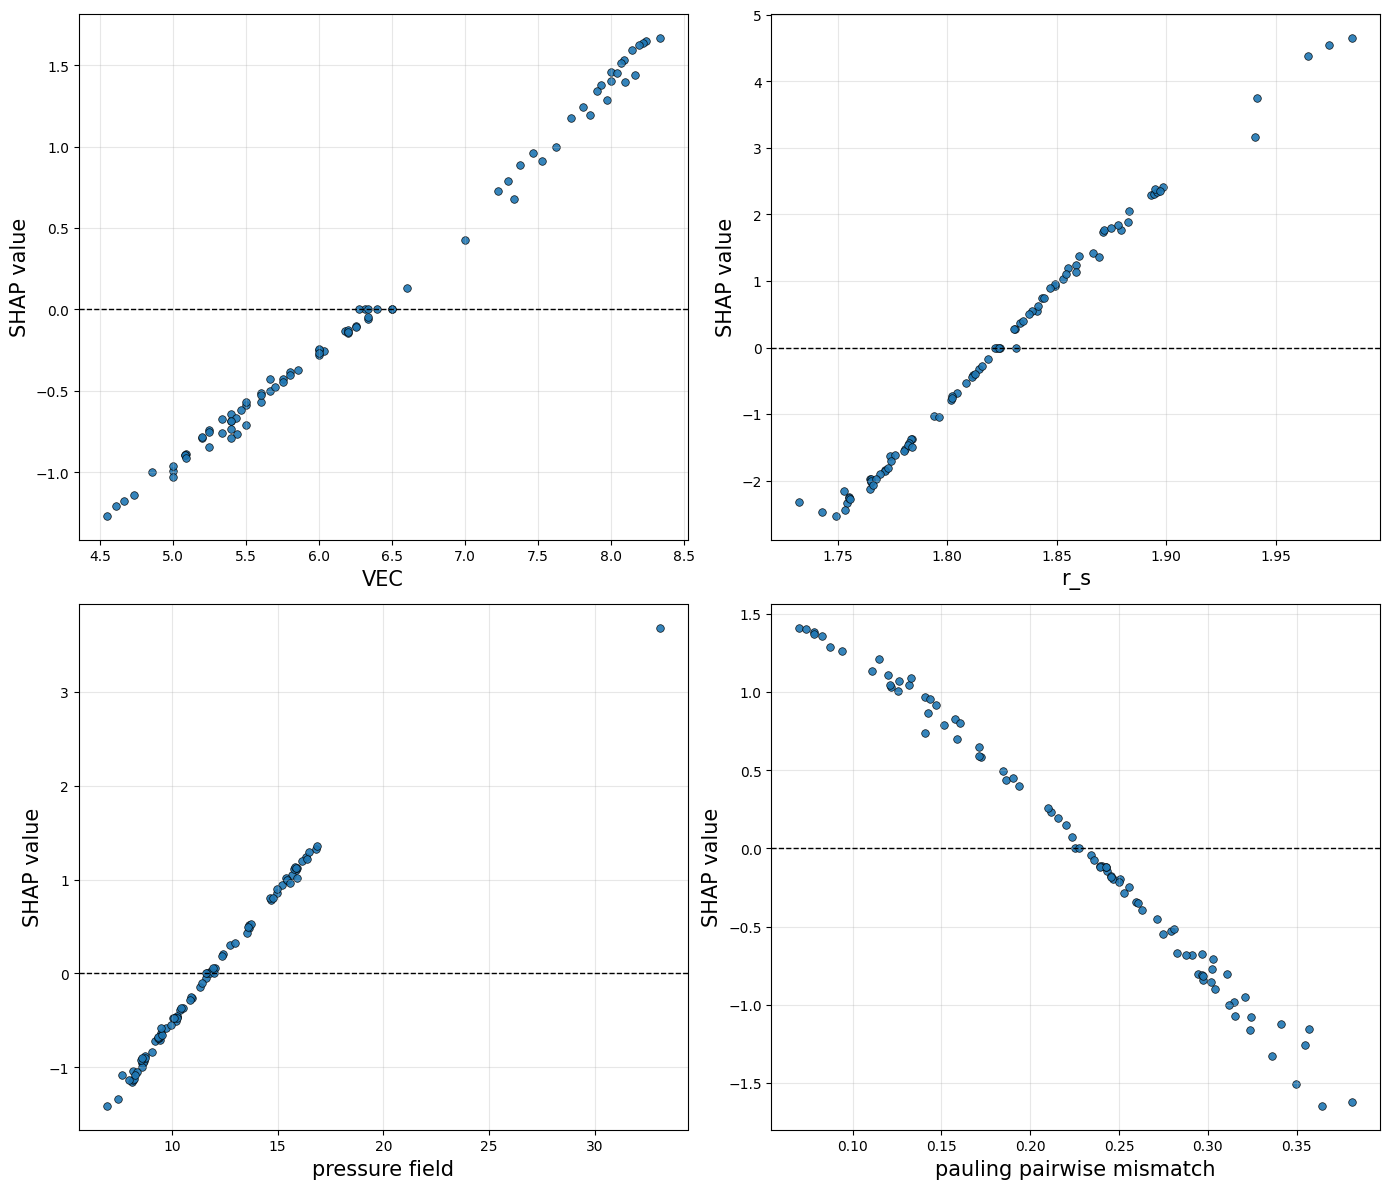

In [113]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

top_features = ['VEC', 'r_s', 'pressure field', 'pauling pairwise mismatch']

for idx, feature in enumerate(top_features):
    ax = axes.flatten()[idx]
    feature_idx = feature_names.index(feature)

    ax.scatter(
        X[feature].values,
        svc_shap_values[:, feature_idx],
        s=30,
        alpha=0.9,
        edgecolors='k',
        linewidths=0.5
    )

    ax.axhline(y=0, color='k', linestyle='--', linewidth=1)
    ax.set_xlabel(feature, fontsize=15)
    ax.set_ylabel('SHAP value', fontsize=15)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('shap_dependence_by_class.png', dpi=600, bbox_inches='tight')
plt.show()

## Combining metrics into a table

In [31]:
print('random forest')
for metric_name, result in rf_results.items():
    print(f"{metric_name.replace('_', ' ').title()}: {result['mean']:.4f} (+/- {result['std']:.4f})")
print('\n')

print('logistic regression')
for metric_name, result in lr_results.items():
    print(f"{metric_name.replace('_', ' ').title()}: {result['mean']:.4f} (+/- {result['std']:.4f})")
print('\n')

print('support vector classification')
for metric_name, result in svc_results.items():
    print(f"{metric_name.replace('_', ' ').title()}: {result['mean']:.4f} (+/- {result['std']:.4f})")
print('\n')


random forest
Balanced Accuracy: 0.8150 (+/- 0.0989)
Precision: 0.8705 (+/- 0.1668)
Recall: 0.7750 (+/- 0.2077)
F1: 0.7892 (+/- 0.1223)


logistic regression
Balanced Accuracy: 0.8075 (+/- 0.1360)
Precision: 0.7800 (+/- 0.1579)
Recall: 0.8250 (+/- 0.1953)
F1: 0.7911 (+/- 0.1544)


support vector classification
Balanced Accuracy: 0.8375 (+/- 0.1315)
Precision: 0.8650 (+/- 0.1817)
Recall: 0.8000 (+/- 0.1500)
F1: 0.8234 (+/- 0.1434)




random forest
Balanced Accuracy: 0.8150 (+/- 0.0989)
Precision: 0.8705 (+/- 0.1668)
Recall: 0.7750 (+/- 0.2077)
F1: 0.7892 (+/- 0.1223)


logistic regression
Balanced Accuracy: 0.8075 (+/- 0.1360)
Precision: 0.7800 (+/- 0.1579)
Recall: 0.8250 (+/- 0.1953)
F1: 0.7911 (+/- 0.1544)


support vector classification
Balanced Accuracy: 0.8375 (+/- 0.1315)
Precision: 0.8650 (+/- 0.1817)
Recall: 0.8000 (+/- 0.1500)
F1: 0.8234 (+/- 0.1434)




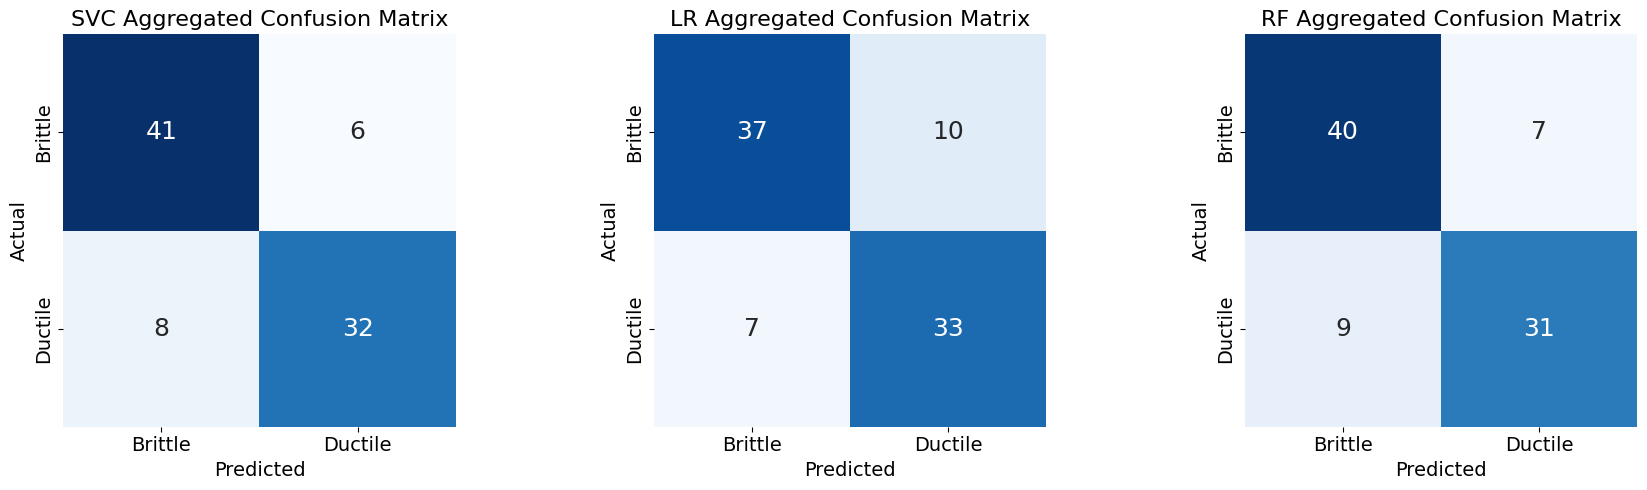

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

labels = ['Brittle', 'Ductile']

# Find global min/max for consistent coloring
vmin = min(svc_agg_cm.min(), lr_agg_cm.min(), rf_agg_cm.min())
vmax = max(svc_agg_cm.max(), lr_agg_cm.max(), rf_agg_cm.max())

# SVC
sns.heatmap(svc_agg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=labels, yticklabels=labels,
            vmin=vmin, vmax=vmax, cbar=False, square=True,
            annot_kws={'fontsize': 18})
axes[0].set_title('SVC Aggregated Confusion Matrix', fontsize=16)
axes[0].set_xlabel('Predicted', fontsize=14)
axes[0].set_ylabel('Actual', fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)

# LR
sns.heatmap(lr_agg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=labels, yticklabels=labels,
            vmin=vmin, vmax=vmax, cbar=False, square=True,
            annot_kws={'fontsize': 18})
axes[1].set_title('LR Aggregated Confusion Matrix', fontsize=16)
axes[1].set_xlabel('Predicted', fontsize=14)
axes[1].set_ylabel('Actual', fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)

# RF (no colorbar)
sns.heatmap(rf_agg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=labels, yticklabels=labels,
            vmin=vmin, vmax=vmax, cbar=False, square=True,
            annot_kws={'fontsize': 18})
axes[2].set_title('RF Aggregated Confusion Matrix', fontsize=16)
axes[2].set_xlabel('Predicted', fontsize=14)
axes[2].set_ylabel('Actual', fontsize=14)
axes[2].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('final_CMS.png', dpi=600)
plt.show()


In [100]:
# Check which class is 0 and which is 1
print("Class 0:", y.unique()[0])  # Should be 0 = Brittle
print("Class 1:", y.unique()[1])  # Should be 1 = Ductile

# If reversed, swap labels
labels = ['Ductile', 'Brittle']  # Adjust based on your encoding


Class 0: 1.6691169912788624
Class 1: 0.6383963636572414


In [34]:
# Fit on all data to get best hyperparameters and final model
best_rf = final_rf.best_estimator_
print("\nBest parameters:", final_rf.best_params_)


best_lr = final_lr.best_estimator_
print("\nBest parameters:", final_lr.best_params_)


best_svc = final_svc.best_estimator_
print("\nBest parameters:", final_svc.best_params_)


Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best parameters: {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}


## Final Model

train most balanced model on all of the data, save weights, examine properties

In [35]:
'''

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best parameters: {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

'''

"\n\nBest parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}\n\nBest parameters: {'classifier__C': 10, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}\n\nBest parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}\n\n"

In [36]:
from sklearn.ensemble import RandomForestClassifier

best_rf =  RandomForestClassifier(
    n_estimators=50,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


best_rf.fit(X,y)


RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=50,
                       n_jobs=-1, random_state=42)

# Alloying strategy/visualizing decision boundary

psudo-ternary/latent space/turn forward predictions into mapping of alloy space

distribution of input elements, sample from it, generate ROM,
or distribution of ROM and calculus on input elements

decision surfaces from support vectors/logits as lagrangian constraints

## Getting distributions of new alloys from gaussian noise on existing compositions (normalize to comp sum = 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 340 to 75
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   composition                87 non-null     object 
 1   is_ductile                 87 non-null     bool   
 2   Mo                         87 non-null     float64
 3   Nb                         87 non-null     float64
 4   Ta                         87 non-null     float64
 5   V                          87 non-null     float64
 6   W                          87 non-null     float64
 7   Cr                         87 non-null     float64
 8   Ti                         87 non-null     float64
 9   Al                         87 non-null     float64
 10  Co                         87 non-null     float64
 11  Fe                         87 non-null     float64
 12  Ni                         87 non-null     float64
 13  Re                         87 non-null     float64
 14 

In [38]:
import numpy as np
import pandas as pd

# noise around existing data

def noisy_compositions(X, noise_scale=0.02, n_samples=5, clip_zero=True, random_state=None):

    rng = np.random.default_rng(random_state)
    X = np.asarray(X, dtype=float)
    n_alloys, n_elems = X.shape

    all_noisy = []
    for i in range(n_alloys):
        # generate noise (Gaussian around 0)
        noise = rng.normal(0, noise_scale, size=(n_samples, n_elems)) + 1
        perturbed = X[i] * noise

        if clip_zero:
            perturbed = np.clip(perturbed, 0, None)

        # renormalize each composition so rows sum to 1
        perturbed /= perturbed.sum(axis=1, keepdims=True)
        all_noisy.append(perturbed)

    return np.vstack(all_noisy)




noisy_X = noisy_compositions(data.iloc[:,2:17], noise_scale=0.3, n_samples=100, random_state=42)
comps = pd.DataFrame(noisy_X, columns=data.iloc[:,2:17].columns)


In [39]:
comps

Mo        Nb        Ta         V         W   Cr   Ti   Al   Co  \
0     0.232146  0.146340  0.260589  0.272720  0.088205  0.0  0.0  0.0  0.0   
1     0.154187  0.230720  0.147980  0.262486  0.204628  0.0  0.0  0.0  0.0   
2     0.309463  0.165439  0.159457  0.142414  0.223228  0.0  0.0  0.0  0.0   
3     0.189675  0.224531  0.189937  0.214251  0.181606  0.0  0.0  0.0  0.0   
4     0.102455  0.186134  0.217025  0.243313  0.251073  0.0  0.0  0.0  0.0   
...        ...       ...       ...       ...       ...  ...  ...  ...  ...   
8695  0.596671  0.000000  0.000000  0.000000  0.108789  0.0  0.0  0.0  0.0   
8696  0.247720  0.000000  0.000000  0.000000  0.451233  0.0  0.0  0.0  0.0   
8697  0.339234  0.000000  0.000000  0.000000  0.135938  0.0  0.0  0.0  0.0   
8698  0.426888  0.000000  0.000000  0.000000  0.222400  0.0  0.0  0.0  0.0   
8699  0.317284  0.000000  0.000000  0.000000  0.303814  0.0  0.0  0.0  0.0   

       Fe   Ni        Re   Hf   Zr   Ru  
0     0.0  0.0  0.000000  0.0  0.0  0.0  
1     0.0  0.0  0.000000  0.0  0.0  0.0  
2     0.0  0.0  0.000000  0.0  0.0  0.0  
3     0.0  0.0  0.000000  0.0  0.0  0.0  
4     0.0  0.0  0.000000  0.0  0.0  0.0  
...   ...  ...       ...  ...  ...  ...  
8695  0.0  0.0  0.294540  0.0  0.0  0.0  
8696  0.0  0.0  0.301046  0.0  0.0  0.0  
8697  0.0  0.0  0.524828  0.0  0.0  0.0  
8698  0.0  0.0  0.350711  0.0  0.0  0.0  
8699  0.0  0.0  0.378902  0.0  0.0  0.0  

[8700 rows x 15 columns]

## ROM calculations on sampled alloys (only features from reduced set)

In [40]:
!wget https://raw.githubusercontent.com/mahata-lab/Tungsten-Ductile-Brittle-Temperature/main/Experimental_Datasets/ROM_dataset.csv
!wget https://raw.githubusercontent.com/mahata-lab/Tungsten-Ductile-Brittle-Temperature/main/Experimental_Datasets/Hmix.csv

--2025-12-09 22:36:38--  https://raw.githubusercontent.com/mahata-lab/Tungsten-Ductile-Brittle-Temperature/main/Experimental_Datasets/ROM_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4369 (4.3K) [text/plain]
Saving to: ‘ROM_dataset.csv’

ROM_dataset.csv     100%[===================>]   4.27K  --.-KB/s    in 0s      

2025-12-09 22:36:38 (55.8 MB/s) - ‘ROM_dataset.csv’ saved [4369/4369]

--2025-12-09 22:36:38--  https://raw.githubusercontent.com/mahata-lab/Tungsten-Ductile-Brittle-Temperature/main/Experimental_Datasets/Hmix.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connec

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


rom = pd.read_csv('/content/ROM_dataset.csv',index_col=0)
Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)
rom.drop(['Atomic number'], axis=0, inplace=True)
rom.drop(['element'], axis=0, inplace=True)
rom = rom.astype(float)
rom.index

Index(['Bulk Modulus', 'r_s', 'rho', 'Atomic radius (pm)', 'Melting point (K)',
       'Boiling point (K)', 'Pauling electronegativity (-)',
       'Allen electronegativity (-)', 'Valence electron concentration (-)',
       'Itinerant electrons per atom (-)', 'Atomic weight (g/mol)',
       'Density (g/cm3)', 'Molar heat capacity (J/mol K)',
       'Thermal conductivity (W/m/K)', 'shear modulus', 'poissons ratio',
       'youngs modulus', 'bulk modulus'],
      dtype='object')

In [42]:
X.columns

Index(['radius_deviation', 'Hmix', 'Smix', 'pauling pairwise mismatch', 'r_s',
       'shear modulus V_AVG', 'bulk modulus V_AVG', 'poissons ratio V_AVG',
       'VEC', 'Tm', 'pressure field', 'G/B'],
      dtype='object')

In [43]:
def extract_nonzero(row):
    # only elements with nonzero composition
    mask = row != 0

    # extract elements and composition
    els = row.index[mask].to_numpy()
    x = row.values[mask].astype(float)
    return els, x

# get two new columns to use in functions
comps['elements'], comps['composition'] = zip(*comps.apply(extract_nonzero, axis=1))


### Radius mismatch

$
\delta r = \sqrt{\sum_{i=1}^n x_i \left(1 - \frac{r_i}{r}\right)^2}
$







In [44]:
import numpy as np

def radius_deviation(x, r):
    """
    Atomic size mismatch parameter δ

    x : array of weights (compositions), should sum to 1
    r : array of atomic radii
    """
    x = np.asarray(x)
    r = np.asarray(r)

    rhat = np.dot(x, r)  # weighted mean radius

    # sum of elementwise products
    return np.sqrt(np.sum(x * (1 - r / rhat) ** 2))

els = ['Co','Fe','Ni']
x = np.array([0.333, 0.333, 0.333]).T
r = rom.loc['Atomic radius (pm)',els].values


print(radius_deviation(x,r))



0.003365508315388705


In [45]:
# apply radius deviation function to each row of comps using lambda row to access multiple values
comps['radius_deviation'] = comps.apply(
    lambda row: radius_deviation(
        row['composition'],
        rom.loc['Atomic radius (pm)', row['elements']].to_numpy()
    ),
    axis=1
)

comps[['elements', 'composition','radius_deviation']].head()

elements                                        composition  \
0  [Mo, Nb, Ta, V, W]  [0.2321461370122186, 0.14633996328756096, 0.26...   
1  [Mo, Nb, Ta, V, W]  [0.15418651565727567, 0.2307202995521419, 0.14...   
2  [Mo, Nb, Ta, V, W]  [0.3094632186126071, 0.16543866980805627, 0.15...   
3  [Mo, Nb, Ta, V, W]  [0.189675130359497, 0.2245309340119975, 0.1899...   
4  [Mo, Nb, Ta, V, W]  [0.10245526712238191, 0.18613365905057427, 0.2...   

   radius_deviation  
0          0.034042  
1          0.033039  
2          0.028175  
3          0.032205  
4          0.032898

### Enthalpy/Entropy of Mixing


$
\Delta H^m = \sum_{i=1}^n \sum_{\substack{j=1 \\ j \ne i}}^n 4 \Delta H_{ij}^m x_i x_j
$

is really just a [quadratic form](https://en.wikipedia.org/wiki/Quadratic_form)

$\displaystyle q_{A}(x_{1},\ldots ,x_{n})=\sum _{i=1}^{n}\sum _{j=1}^{n}a_{ij}{x_{i}}{x_{j}}=\mathbf {x} ^{\mathsf {T}}A\mathbf {x}$ when A is symmetric, which it is for pairwise mixing enthalpies. The data we have is upper triangular, so we'll transform it to a symmetric matrix with the same quadratic form.

$\displaystyle B=\left({\frac {a_{ij}+a_{ji}}{2}}\right)={\frac {1}{2}}(A+A^{\text{T}})$

so that
$\Delta H^m = \mathbf {x} ^{\mathsf {T}}B\mathbf {x}$
where x is the composition vector.

Multiplying this by 4 gives the correct Hmix according to the Miedema model


In [46]:
Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)

def alloy_Hmix(els, x, Hmix):
  '''
  input:
  els (list of element name, str)
  Hmix (df of the Hmix data)

  output:
  quadratic form Hmix matrix (np.array)
  '''
  # get the pairwise Hmix for the elements in alloy - Multiply by 4 to get 4*Hmix(i,j) in each entry of the matrix
  H = 4*np.array(Hmix.loc[els][els])

  # symmetrize
  B = 1/2*(H+H.T)

  return x.T @ B @ x

# elements in the alloy
els = ['Al','Co','Fe','Ni']
# composition vector x - will be variable in the optimization process
x = np.array([0.143, 0.286, 0.286, 0.286]).T


alloy_Hmix(els,x,Hmix)


np.float64(-9.488336)

In [47]:
Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)

comps['Hmix'] = comps.apply(
    lambda row: alloy_Hmix(
        row['elements'],
        row['composition'],
        Hmix
    ),
    axis=1
)

comps[['elements', 'composition','Hmix']].head()

elements                                        composition  \
0  [Mo, Nb, Ta, V, W]  [0.2321461370122186, 0.14633996328756096, 0.26...   
1  [Mo, Nb, Ta, V, W]  [0.15418651565727567, 0.2307202995521419, 0.14...   
2  [Mo, Nb, Ta, V, W]  [0.3094632186126071, 0.16543866980805627, 0.15...   
3  [Mo, Nb, Ta, V, W]  [0.189675130359497, 0.2245309340119975, 0.1899...   
4  [Mo, Nb, Ta, V, W]  [0.10245526712238191, 0.18613365905057427, 0.2...   

       Hmix  
0 -3.622002  
1 -4.281204  
2 -4.706335  
3 -4.524137  
4 -4.560285

In [48]:
# ΔSmix​= −R ∑​ci​*ln(ci)


def alloy_Smix(x):
  # only a function of the composition vector

  lnx = np.log(x)
  R = 8.314
  S = -R*(x @ lnx)
  return S

x = np.array([0.143, 0.286, 0.286, 0.286])
alloy_Smix(x)


np.float64(11.241652705037614)

In [49]:
comps['Smix'] = comps.apply(
    lambda row: alloy_Smix(
        row['composition']
    ),
    axis=1
)

comps[['elements', 'composition','Smix']].head()

elements                                        composition  \
0  [Mo, Nb, Ta, V, W]  [0.2321461370122186, 0.14633996328756096, 0.26...   
1  [Mo, Nb, Ta, V, W]  [0.15418651565727567, 0.2307202995521419, 0.14...   
2  [Mo, Nb, Ta, V, W]  [0.3094632186126071, 0.16543866980805627, 0.15...   
3  [Mo, Nb, Ta, V, W]  [0.189675130359497, 0.2245309340119975, 0.1899...   
4  [Mo, Nb, Ta, V, W]  [0.10245526712238191, 0.18613365905057427, 0.2...   

        Smix  
0  12.797106  
1  13.178649  
2  13.017188  
3  13.353063  
4  13.043136

### Pairwise mismatch in electronegativity

from hume rothery

$\delta_{\chi} = \frac{\sum_{i=1}^{n} \sum_{\substack{j=1 \\ j \neq i}}^{n}
c_i c_j \left| \tfrac{\chi_i - \chi_j}{\chi} \right|}
{\sum_{i=1}^{n} \sum_{\substack{j=1 \\ j \neq i}}^{n} c_i c_j}$

the numerator is a quadradic form since it forms a symmetric matrix by default. The denominator is just a normalization factor.


In [50]:

def pairwise_mismatch(els,x,rom,e_type='Pauling'):

  # get the vector of electronegativity of the specified type
  chi = rom.loc[f'{electronegativity_type} electronegativity (-)', els].to_numpy()
  avg_chi = np.mean(chi)
  # cast the difference of the vectors into a matrix
  diff = abs(chi[:, None] - chi[None, :])/avg_chi

  # quadratic form to get a pairwise mismatch
  pairwise_diff = x.T @ diff @ x

  # normalization
  norm = 0
  for i in range(len(x)):
    for j in range(len(x)):
      if i != j:
        norm += x[i]*x[j]

  mismatch = pairwise_diff / norm

  return mismatch

electronegativity_type ='Pauling'
# elements in the alloy
els = ['Al', 'Co', 'Fe', 'Ni']
x = np.array([0.143, 0.286, 0.286, 0.286])

pairwise_mismatch(els,x,rom)

np.float64(0.06823420931304744)

In [51]:
comps['pauling pairwise mismatch'] = comps.apply(
    lambda row: pairwise_mismatch(
        row['elements'],
        row['composition'],
        rom,
        e_type='Pauling'
    ),
    axis=1
)

comps[['elements', 'composition','pauling pairwise mismatch']].head()

elements                                        composition  \
0  [Mo, Nb, Ta, V, W]  [0.2321461370122186, 0.14633996328756096, 0.26...   
1  [Mo, Nb, Ta, V, W]  [0.15418651565727567, 0.2307202995521419, 0.14...   
2  [Mo, Nb, Ta, V, W]  [0.3094632186126071, 0.16543866980805627, 0.15...   
3  [Mo, Nb, Ta, V, W]  [0.189675130359497, 0.2245309340119975, 0.1899...   
4  [Mo, Nb, Ta, V, W]  [0.10245526712238191, 0.18613365905057427, 0.2...   

   pauling pairwise mismatch  
0                   0.220490  
1                   0.238223  
2                   0.258184  
3                   0.238390  
4                   0.251784

### Voigt and Reuss averages

Voigt averages are weighted arithmetic means:

$\displaystyle V = \sum_{i=1}^n w_i P_i$


Reuss averages are weighted harmonic means:

$R = \frac{\sum_{i=1}^{n} w_i}{\sum_{i=1}^{n} \tfrac{w_i}{P_i}}$

in this case, the weights are composition, so the numerator sums to 1 every time.

The hill average is the arithmetic mean of the two bounds, and fits experimental values well for polycrystals


In [52]:
def voigt_average(els, x, rom, prop):

  # access property vector for the chosen property and chosen elements
  Pi = rom.loc[f'{prop}',els].to_numpy()

  # arithmetic mean with dot product of composition
  P = x @ Pi
  return P


els = ['Mo', 'Nb', 'Ta', 'W']
x = np.array([0.25, 0.25, 0.25, 0.25]).T

# using both averages gives upper and lower bounds
voigt_average(els,x,rom, 'shear modulus')


np.float64(71.5)

In [53]:
comps['shear modulus V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'shear modulus'
    ),
    axis=1
)

comps['bulk modulus V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'bulk modulus'
    ),
    axis=1
)

comps['r_s'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'r_s'
    ),
    axis=1
)

comps['VEC'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'Valence electron concentration (-)'
    ),
    axis=1
)

comps['poissons ratio V_AVG'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'poissons ratio'
    ),
    axis=1
)

comps['Tm'] = comps.apply(
    lambda row: voigt_average(
        row['elements'],
        row['composition'],
        rom,
        prop = 'Melting point (K)'
    ),
    axis=1
)


In [54]:
comps['G/B']=comps['shear modulus V_AVG']/comps['bulk modulus V_AVG']

### Pressure Field

Pressure field ≡ 𝛍(𝟏+𝛎)/𝟑𝛑(𝟏-𝛎)

In [55]:
# Pressure field ≡ 𝛍(𝟏+𝛎)/𝟑𝛑(𝟏-𝛎)
def pressure_field(shear_modulus, poissons_ratio):
  return (shear_modulus*(1+poissons_ratio))/(3*np.pi*(1-poissons_ratio))

comps['pressure field'] = comps.apply(
    lambda row: pressure_field(
        row['shear modulus V_AVG'],
        row['poissons ratio V_AVG']
    ),
    axis=1
)

comps['pressure field'].head()

0    11.905977
1    14.601936
2    13.904858
3    13.968902
4    16.281064
Name: pressure field, dtype: float64

In [56]:
# E(T)/E(0) = [1 - a(T/Tm)]  a = 0.5

## Classification of sampled alloys

run through existing classifier(s)

In [57]:
comps.shape

(8700, 29)

In [58]:
# ONLY include rows with in ROM parameters between min and max of training set
# interpolation ONLY

mask = (comps[X.columns] <= X.max()) & (comps[X.columns]>= X.min())
comps = comps[mask.all(axis=1)]

In [59]:
comps.shape

(6550, 29)

In [60]:
# order comps df by dataset columns to pass through classifiers
comps[X.columns].head(2)

radius_deviation      Hmix       Smix  pauling pairwise mismatch       r_s  \
1          0.033039 -4.281204  13.178649                   0.238223  1.836592   
2          0.028175 -4.706335  13.017188                   0.258184  1.822951   

   shear modulus V_AVG  bulk modulus V_AVG  poissons ratio V_AVG       VEC  \
1            67.047630          209.713601              0.344815  5.358814   
2            65.792634          223.179235              0.331521  5.532691   

            Tm  pressure field       G/B  
1  2896.964124       14.601936  0.319710  
2  3011.490029       13.904858  0.294797

In [61]:
X.head(2)

radius_deviation  Hmix       Smix  pauling pairwise mismatch      r_s  \
340          0.031506 -4.64  13.380867                   0.246486  1.83338   
347          0.023182 -6.50  11.525651                   0.274716  1.83075   

     shear modulus V_AVG  bulk modulus V_AVG  poissons ratio V_AVG  VEC  \
340                 66.6               214.0                0.3400  5.4   
347                 71.5               227.5                0.3325  5.5   

          Tm  pressure field       G/B  
340  2962.80        9.072002  0.311215  
347  3157.75        8.693858  0.314286

In [62]:
comps['rf_prediction'] = best_rf.predict(comps[X.columns])
comps['LR_prediction'] = best_lr.predict(comps[X.columns])
comps['SVC_prediction'] = best_svc.predict(comps[X.columns])

/tmp/ipython-input-1678650694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['rf_prediction'] = best_rf.predict(comps[X.columns])
/tmp/ipython-input-1678650694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['LR_prediction'] = best_lr.predict(comps[X.columns])
/tmp/ipython-input-1678650694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [63]:
comps['rf_proba'] = best_rf.predict_proba(comps[X.columns])[:, 1]

comps['LR_proba'] = best_lr.predict_proba(comps[X.columns])[:, 1]
comps['LR_decision'] = best_lr.decision_function(comps[X.columns])

comps['SVC_decision'] = best_svc.decision_function(comps[X.columns])

/tmp/ipython-input-3648695548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['rf_proba'] = best_rf.predict_proba(comps[X.columns])[:, 1]
/tmp/ipython-input-3648695548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['LR_proba'] = best_lr.predict_proba(comps[X.columns])[:, 1]
/tmp/ipython-input-3648695548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [64]:
comps[~comps['rf_prediction'] & ~comps['LR_prediction'] & ~comps['SVC_prediction']].head(3)

Mo   Nb        Ta         V         W        Cr        Ti   Al   Co  \
200  0.0  0.0  0.399812  0.134705  0.231460  0.216585  0.017438  0.0  0.0   
202  0.0  0.0  0.143805  0.252259  0.302462  0.261124  0.040351  0.0  0.0   
203  0.0  0.0  0.219445  0.240281  0.270702  0.246363  0.023209  0.0  0.0   

      Fe  ...           Tm       G/B  pressure field  rf_prediction  \
200  0.0  ...  2970.689106  0.457769       18.996906          False   
202  0.0  ...  2788.966602  0.487758       19.863660          False   
203  0.0  ...  2828.871243  0.475126       19.429247          False   

     LR_prediction SVC_prediction  rf_proba  LR_proba  LR_decision  \
200          False          False  0.225205  0.004582    -5.381005   
202          False          False  0.308306  0.023006    -3.748729   
203          False          False  0.275062  0.012133    -4.399640   

     SVC_decision  
200     -0.780143  
202     -1.110657  
203     -0.840621  

[3 rows x 36 columns]

In [65]:
# comps.to_csv('test_comps.csv')

comps.to_csv('test_compositions.csv')

##Visualization

 [Affine Transformation of Composition Simplex](https://www.sciencedirect.com/org/science/article/pii/S2635098X24002274#fig2)



### Functions + alloy space

In [66]:
import pandas as pd

comps = pd.read_csv('/content/test_compositions.csv', index_col=0)
comps = comps[(comps['W']>0.2) & (comps['W']<0.4)]
comps.shape

(3338, 36)

In [67]:
import numpy as np
from scipy.spatial import HalfspaceIntersection, ConvexHull
from matplotlib import colormaps
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


def get_alloy_space(comp_df, elements):
    # get the barycentric alloy space
    # elements can be individual or psuedo (grouped)

    df = comp_df.copy()
    for el in elements:
        if '_' in el:
            # split string into sub-elements (e.g. 'Mo_Nb' -> ['Mo', 'Nb'])
            combined = el.split('_')

            # sum the components of the group to form the new pseudo-element column
            df[el] = df[combined].sum(axis=1)

            # drop the original columns (if present)
            df.drop(columns=[c for c in combined if c in df.columns], inplace=True)



    # filter rows where composition sums to 1
    space = df[abs(1-df[elements].sum(axis=1))<0.001]

    return space


def ngon_vertices(n, radius=1.0, rotation=0.0):
  # get set of vertices from number of elements
  # what the simplex gets projected to

  ang = rotation + 2*np.pi*np.arange(n)/n
  V = np.c_[radius*np.cos(ang), radius*np.sin(ang)]  # (n,2)
  return V


def affine_project(c, V):
  # Given composition c (sum=1) and polygon vertex matrix V (n,2):
  # x = V^T c  (equivalently: x = c @ V)

  c = np.asarray(c)
  return c @ V


def plot_affine_map(V, points, labels, prop=None, z_name=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # vertices
    for i, (vx, vy) in enumerate(V):
        ax.scatter([vx], [vy], s=30, color='black')
        ax.text(vx*1.08, vy*1.08, f"{labels[i]}", ha='center', va='center')

    # polygon boundary
    ax.plot(*V[[*range(len(V)), 0]].T, color='black', lw=2)

    # property coloring
    if prop is not None:
        if prop.dtype == bool:
            from matplotlib.colors import ListedColormap, BoundaryNorm
            cmap = ListedColormap(['orange', 'blue'])
            norm = BoundaryNorm([-0.5, 0.5, 1.5], cmap.N)
            sc = ax.scatter(points[:,0], points[:,1], s=20, c=prop.astype(int), cmap=cmap, norm=norm)
            cbar = plt.colorbar(sc, ax=ax, ticks=[0,1], fraction=0.03, pad=0.02, aspect=20)
            cbar.ax.set_yticklabels(['False','True'])
        else:
            sc = ax.scatter(points[:,0], points[:,1], s=20, c=prop, cmap='viridis')
            cbar = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)

        if z_name:
            cbar.set_label(z_name, rotation=270, labelpad=10)
    else:
        ax.scatter(points[:,0], points[:,1], s=20, color='gray')

    ax.axis("off")
    ax.set_aspect("equal")
    return ax





In [68]:
# specify elements, can be single or multiple separated by underscore - DO NOT REUSE ELEMENTS
elements = ['W','Ta','V','Mo','Nb','Ti','Zr','Hf','Ni','Fe','Cr']
# elements = ['W','Mo','Ti','Zr','Hf','Ni']

#elements = ['W_Ta_Mo_Nb','Ti','Ni']

# elements = ['W_Ta','Hf','Zr']

n = len(elements)
# get vertices to project onto
V = ngon_vertices(n, radius=1.0, rotation=np.pi/2)  # rotated 90 degrees for visual

# get the composition space
c_space = get_alloy_space(comps, elements)
# get list of just the compositions
c_list = c_space[elements]

# get list of projections of C onto V
p_list = affine_project(c_list, V)


### Plots

<Axes: >

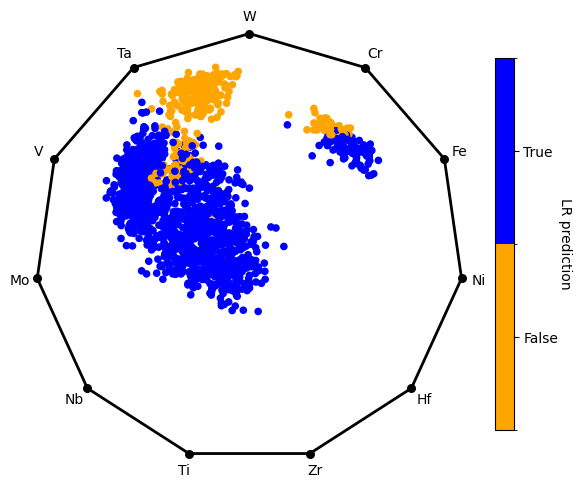

In [69]:
plot_affine_map(V, p_list, elements, c_space['LR_prediction'], 'LR prediction')

<Axes: >

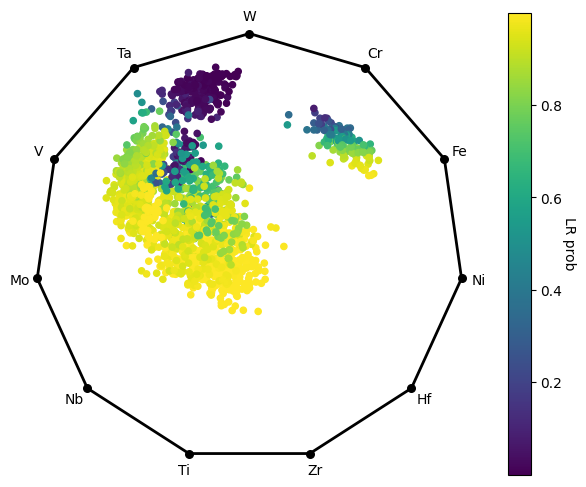

In [70]:
plot_affine_map(V, p_list, elements, c_space['LR_proba'], 'LR prob')

<Axes: >

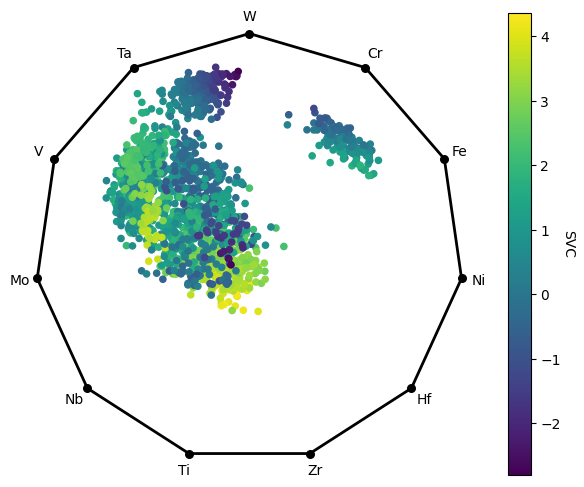

In [71]:
plot_affine_map(V, p_list, elements, c_space['SVC_decision'], 'SVC')

In [72]:
props = [
    ('SVC_prediction', 'SVC pred'),
    ('SVC_decision', 'SVC dec')
]

n = len(props)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.ravel()

for ax, (col, title) in zip(axes, props):
    plot_affine_map(V, p_list, elements, c_space[col], title, ax=ax)

# turn off unused axes
for ax in axes[n:]:
    ax.axis('off')


plt.show()

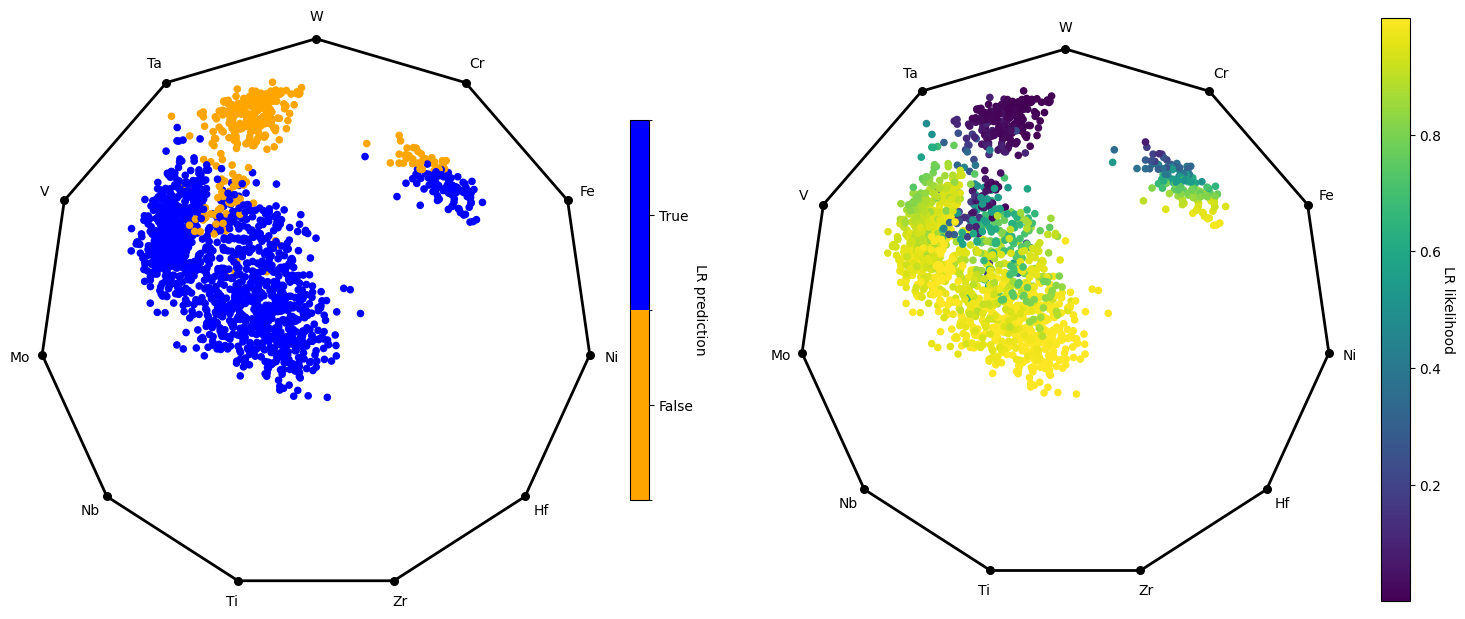

In [73]:
props = [
    ('LR_prediction', 'LR prediction'),
    ('LR_proba', 'LR likelihood')
]

n = len(props)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.ravel()

for ax, (col, title) in zip(axes, props):
    plot_affine_map(V, p_list, elements, c_space[col], title, ax=ax)

# turn off unused axes
for ax in axes[n:]:
    ax.axis('off')


plt.show()

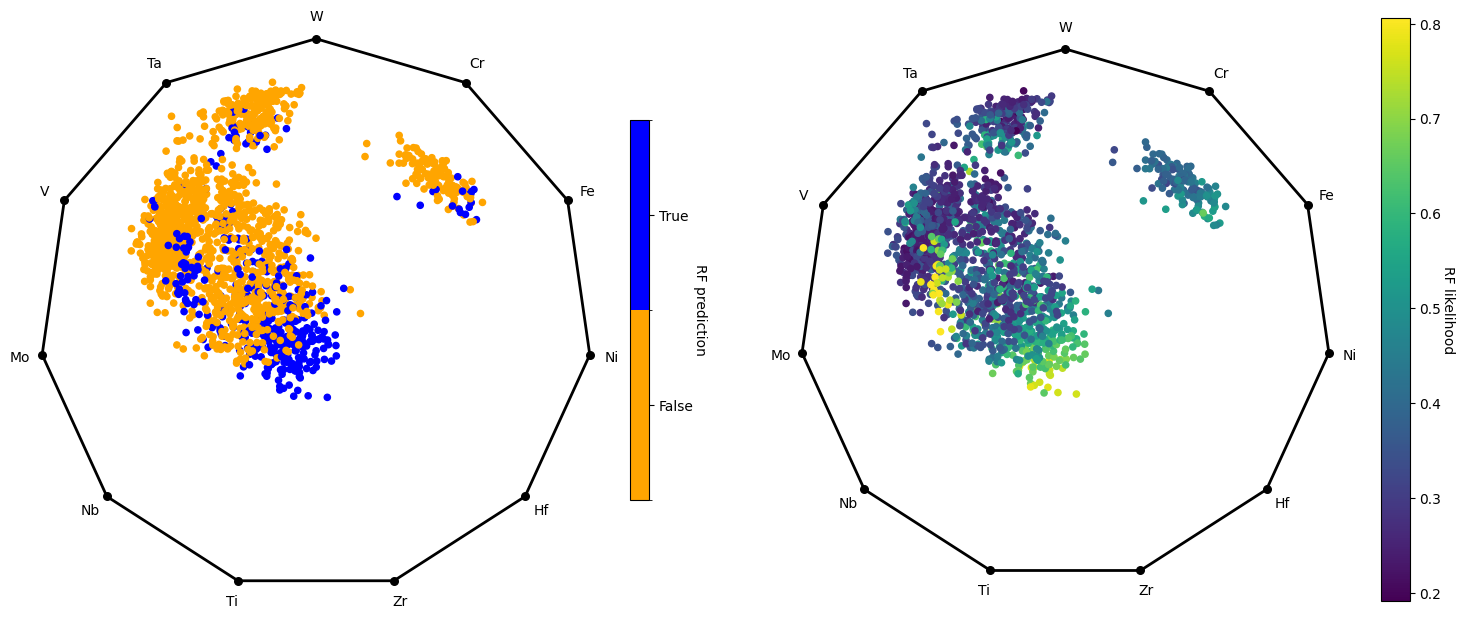

In [74]:
props = [
    ('rf_prediction', 'RF prediction'),
    ('rf_proba', 'RF likelihood')
]

n = len(props)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.ravel()

for ax, (col, title) in zip(axes, props):
    plot_affine_map(V, p_list, elements, c_space[col], title, ax=ax)

# turn off unused axes
for ax in axes[n:]:
    ax.axis('off')


plt.show()

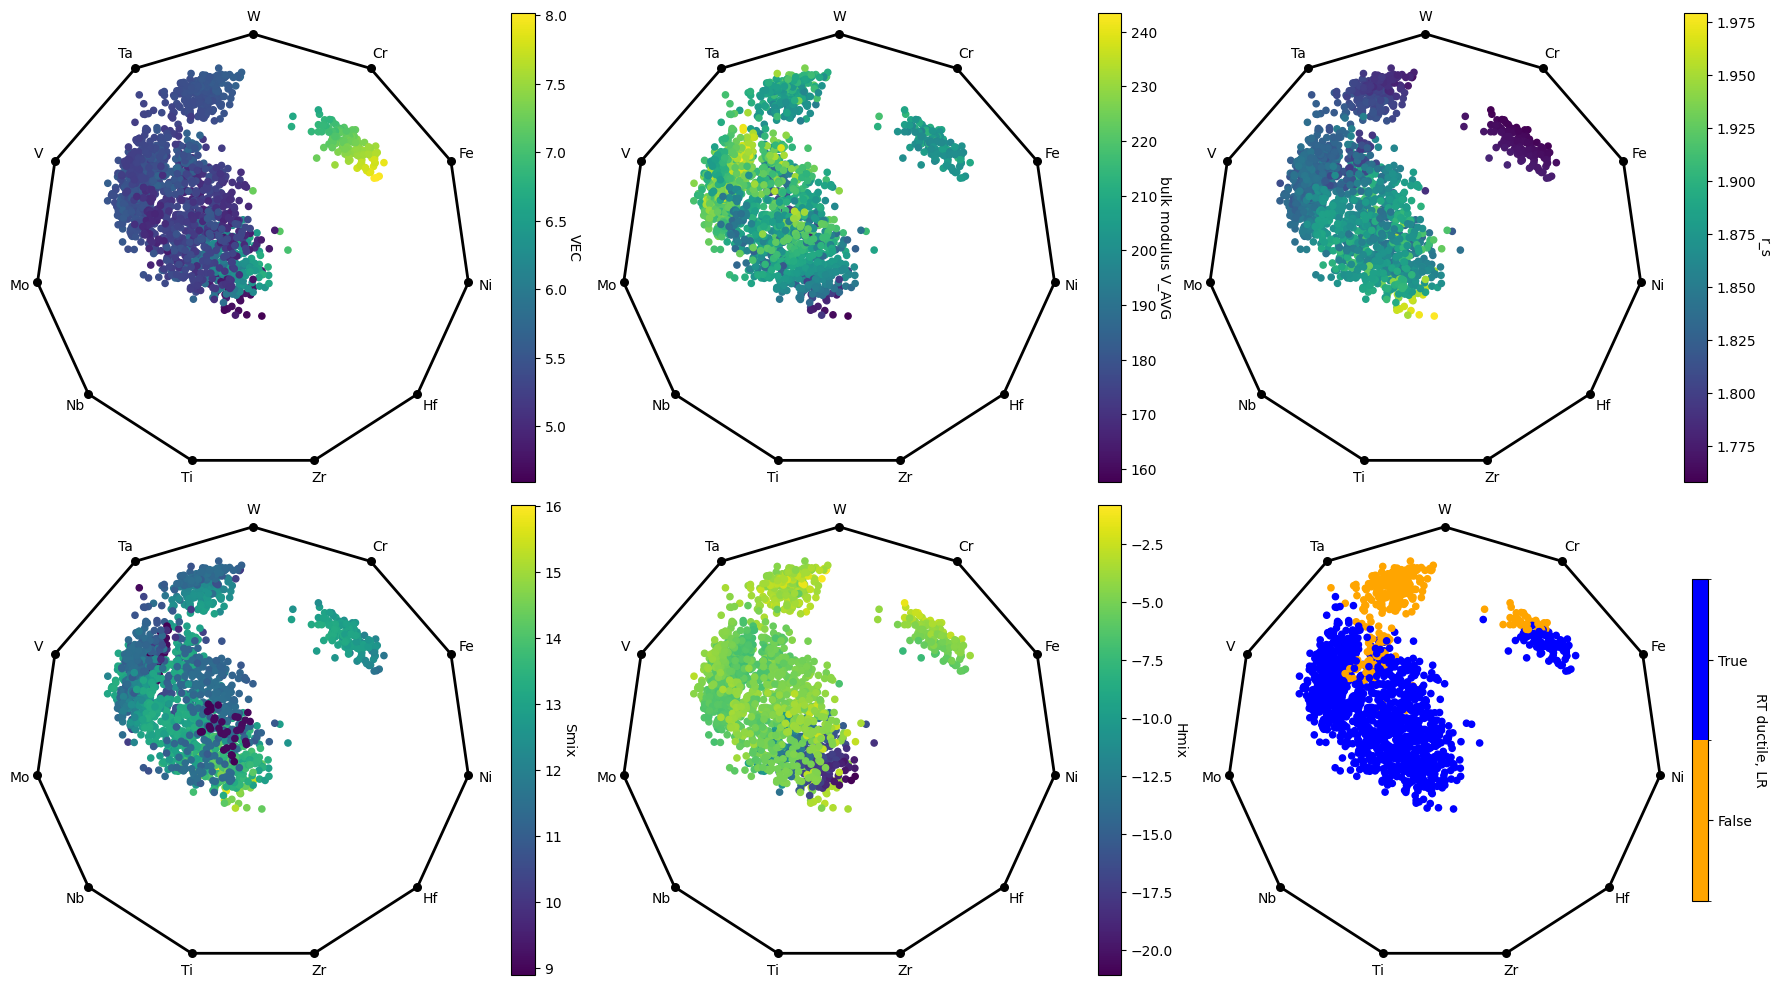

In [75]:
props = [
    ('VEC', 'VEC'),
    ('bulk modulus V_AVG', 'bulk modulus V_AVG'),
    ('r_s', 'r_s'),
    ('Smix', 'Smix'),
    ('Hmix', 'Hmix'),
    ('LR_prediction', 'RT ductile, LR')
]

n = len(props)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
axes = axes.ravel()

for ax, (col, title) in zip(axes, props):
    plot_affine_map(V, p_list, elements, c_space[col], title, ax=ax)

# turn off unused axes
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()



### Ternary plots

In [76]:
!pip install -q mpltern

In [77]:
el_only = comps.iloc[:,0:15]
el_only.columns

Index(['Mo', 'Nb', 'Ta', 'V', 'W', 'Cr', 'Ti', 'Al', 'Co', 'Fe', 'Ni', 'Re',
       'Hf', 'Zr', 'Ru'],
      dtype='object')

In [78]:
from itertools import combinations
from collections import Counter

def find_compositions(df, threshold=0.0, tol=0.01):
    compositions = Counter()

    for _, row in df.iterrows():
        present = row[row > threshold]
        if abs(present.sum() - 1.0) < tol:
            key = tuple(sorted(present.index))
            compositions[key] += 1

    return compositions

# Usage
comps_grouped = find_compositions(el_only)

grp =  pd.DataFrame(
    [(els, count) for els, count in comps_grouped.most_common()],
    columns=['elements', 'count']
)

In [79]:
# look through to see what ternary plots can be used, extract the most used combination for each alloying element
els = ['Ni', 'Ti', 'Zr', 'Re', 'Co', 'Fe', 'Cr', 'Hf', 'V','Al','Ru']
best = {}

for el in els:
    matches = grp[grp['elements'].apply(lambda x: el in x)]
    if len(matches) > 0:
        best[el] = matches.iloc[0].values  # Most common composition with this element
    else:
        best[el] = 'no matches'

In [80]:
best

{'Ni': array([('Mo', 'Nb', 'Ni', 'Ta', 'Ti', 'W'), np.int64(235)], dtype=object),
 'Ti': array([('Mo', 'Nb', 'Ni', 'Ta', 'Ti', 'W'), np.int64(235)], dtype=object),
 'Zr': array([('Mo', 'Nb', 'Ta', 'W', 'Zr'), np.int64(182)], dtype=object),
 'Re': array([('Mo', 'Nb', 'Re', 'Ta', 'W'), np.int64(112)], dtype=object),
 'Co': array([('Co', 'Mo', 'Ni', 'V', 'W'), np.int64(102)], dtype=object),
 'Fe': array([('Cr', 'Fe', 'Ni', 'V', 'W'), np.int64(135)], dtype=object),
 'Cr': array([('Cr', 'Ta', 'Ti', 'V', 'W'), np.int64(138)], dtype=object),
 'Hf': array([('Hf', 'Nb', 'Ta', 'W'), np.int64(109)], dtype=object),
 'V': array([('Cr', 'Ta', 'Ti', 'V', 'W'), np.int64(138)], dtype=object),
 'Al': 'no matches',
 'Ru': array([('Hf', 'Mo', 'Ru', 'W'), np.int64(77)], dtype=object)}

In [81]:
# define psuedoternary alloy spaces to visualize using ^
# combine refractory elements into sums (pseudo elements)
ternary_spaces = [
    ['Mo_Nb_Ta_W','Ni','Ti'],
    ['Mo_Nb_Ta','W','Zr'],
    ['Mo_W','Hf','Re'],
    ['Mo_W','Co_Ni','V'],
    ['Mo_W','V_Ni','Co'],
    ['W_V_Ni','Fe','Cr'],
    ['W_Ta','Nb','Hf'],
    ['W_Ta_Ti','V','Cr'],
    ['Mo_W','Hf','Ru']
]
'''
ternary_spaces = [
    ['Mo_Nb_Ta_W','Ni','Ti'],
    ['Mo_W','Co_Ni','V'],
    ['W_V_Ni','Fe','Cr'],
]
'''

"\nternary_spaces = [\n    ['Mo_Nb_Ta_W','Ni','Ti'],\n    ['Mo_W','Co_Ni','V'],\n    ['W_V_Ni','Fe','Cr'],\n]\n"

In [82]:
comps.columns

Index(['Mo', 'Nb', 'Ta', 'V', 'W', 'Cr', 'Ti', 'Al', 'Co', 'Fe', 'Ni', 'Re',
       'Hf', 'Zr', 'Ru', 'elements', 'composition', 'radius_deviation', 'Hmix',
       'Smix', 'pauling pairwise mismatch', 'shear modulus V_AVG',
       'bulk modulus V_AVG', 'r_s', 'VEC', 'poissons ratio V_AVG', 'Tm', 'G/B',
       'pressure field', 'rf_prediction', 'LR_prediction', 'SVC_prediction',
       'rf_proba', 'LR_proba', 'LR_decision', 'SVC_decision'],
      dtype='object')

In [83]:
comps[(comps['Ti']>0) & (comps['SVC_prediction'])]

Mo        Nb        Ta         V         W        Cr        Ti   Al  \
210   0.0  0.000000  0.283073  0.241385  0.205606  0.192913  0.077024  0.0   
213   0.0  0.000000  0.224566  0.312987  0.209353  0.198192  0.054902  0.0   
221   0.0  0.000000  0.197582  0.331507  0.304698  0.128124  0.038089  0.0   
227   0.0  0.000000  0.371107  0.283775  0.244193  0.084400  0.016526  0.0   
230   0.0  0.000000  0.306320  0.235484  0.278496  0.144456  0.035245  0.0   
...   ...       ...       ...       ...       ...       ...       ...  ...   
3686  0.0  0.127348  0.200561  0.095078  0.219096  0.000000  0.357916  0.0   
3687  0.0  0.176340  0.164784  0.200655  0.211471  0.000000  0.246749  0.0   
3688  0.0  0.236058  0.154366  0.195188  0.212915  0.000000  0.201473  0.0   
3694  0.0  0.159857  0.116880  0.284878  0.215997  0.000000  0.222388  0.0   
3699  0.0  0.254344  0.101685  0.171824  0.258053  0.000000  0.214094  0.0   

       Co   Fe  ...           Tm       G/B  pressure field  rf_prediction  \
210   0.0  0.0  ...  2788.019275  0.448724       17.858059           True   
213   0.0  0.0  ...  2734.254814  0.448643       17.860522           True   
221   0.0  0.0  ...  2852.823686  0.445365       19.172591          False   
227   0.0  0.0  ...  2958.782384  0.417522       18.218269          False   
230   0.0  0.0  ...  2934.219034  0.445633       19.091637          False   
...   ...  ...  ...          ...       ...             ...            ...   
3686  0.0  0.0  ...  2721.885748  0.400339       15.543899           True   
3687  0.0  0.0  ...  2725.432200  0.383918       15.490889           True   
3688  0.0  0.0  ...  2760.898423  0.376214       15.543538           True   
3694  0.0  0.0  ...  2675.794436  0.383118       15.504800           True   
3699  0.0  0.0  ...  2778.143342  0.388052       16.292681           True   

      LR_prediction SVC_prediction  rf_proba  LR_proba  LR_decision  \
210           False           True  0.552842  0.048994    -2.965814   
213           False           True  0.622044  0.048826    -2.969441   
221           False           True  0.356896  0.181247    -1.507919   
227           False           True  0.334498  0.104371    -2.149577   
230           False           True  0.281905  0.060999    -2.733960   
...             ...            ...       ...       ...          ...   
3686           True           True  0.753685  0.999901     9.216956   
3687           True           True  0.805870  0.998842     6.759674   
3688           True           True  0.798364  0.998230     6.335038   
3694           True           True  0.805870  0.997309     5.914965   
3699           True           True  0.711044  0.999025     6.931787   

      SVC_decision  
210       0.646409  
213       0.520672  
221       0.330038  
227       0.733877  
230       0.143459  
...            ...  
3686      3.726374  
3687      3.690881  
3688      3.657994  
3694      3.335555  
3699      3.507482  

[421 rows x 36 columns]

/tmp/ipython-input-1816619200.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


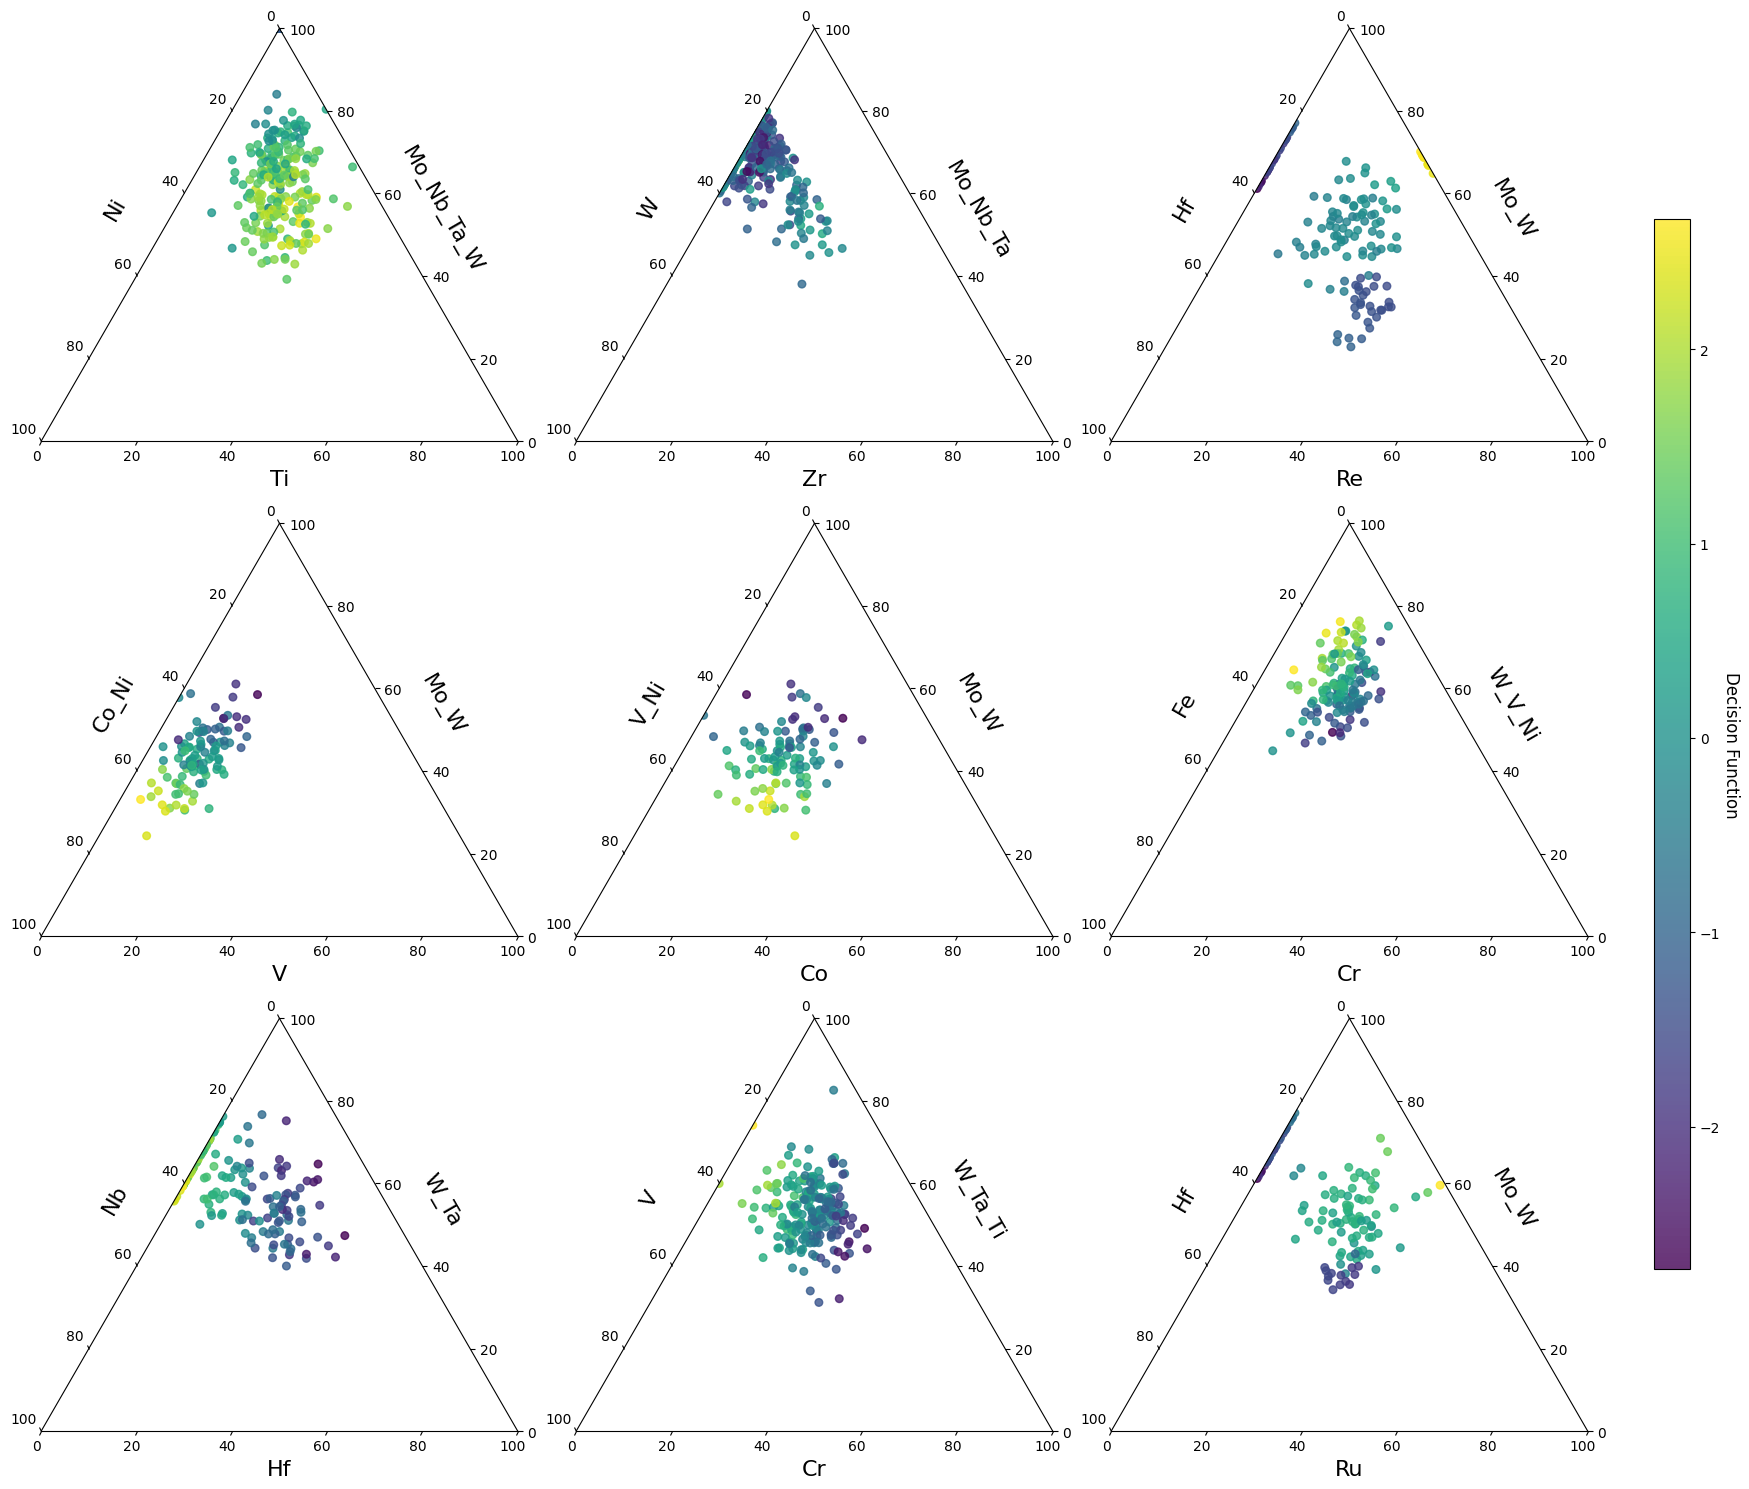

In [120]:
import matplotlib.pyplot as plt
import mpltern


n_plots = len(ternary_spaces)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig = plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for i, elements in enumerate(ternary_spaces):
    ax = fig.add_subplot(n_rows, n_cols, i + 1, projection="ternary", ternary_sum=100.0)

    # get the c_space df using the pseudo ternaries
    c_space = get_alloy_space(comps, elements)

    # set vertex positions
    t = c_space[elements[0]]
    l = c_space[elements[1]]
    r = c_space[elements[2]]
    # color with probabilities
    p = c_space['SVC_decision']

    pc = ax.scatter(t, l, r, c=p, cmap='viridis', s=30, alpha=0.8)

    ax.set_tlabel(elements[0], rotation=0, fontsize=16)
    ax.set_llabel(elements[1], rotation=0, fontsize=16)
    ax.set_rlabel(elements[2], rotation=0, fontsize=16)

    ax.taxis.set_label_position('tick1')
    ax.laxis.set_label_position('tick1')
    ax.raxis.set_label_position('tick1')

    ax.tick_params(labelrotation='horizontal')

    '''
    ax.taxis.set_label_rotation_mode('horizontal')
    ax.laxis.set_label_rotation_mode('horizontal')
    ax.raxis.set_label_rotation_mode('horizontal')
    '''

# Single colorbar for all
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
colorbar = fig.colorbar(pc, cax=cax)
colorbar.set_label("Decision Function", rotation=270, va="baseline", fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('decision_ternaries_final.png',dpi=600)
plt.show()

/tmp/ipython-input-3997791892.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


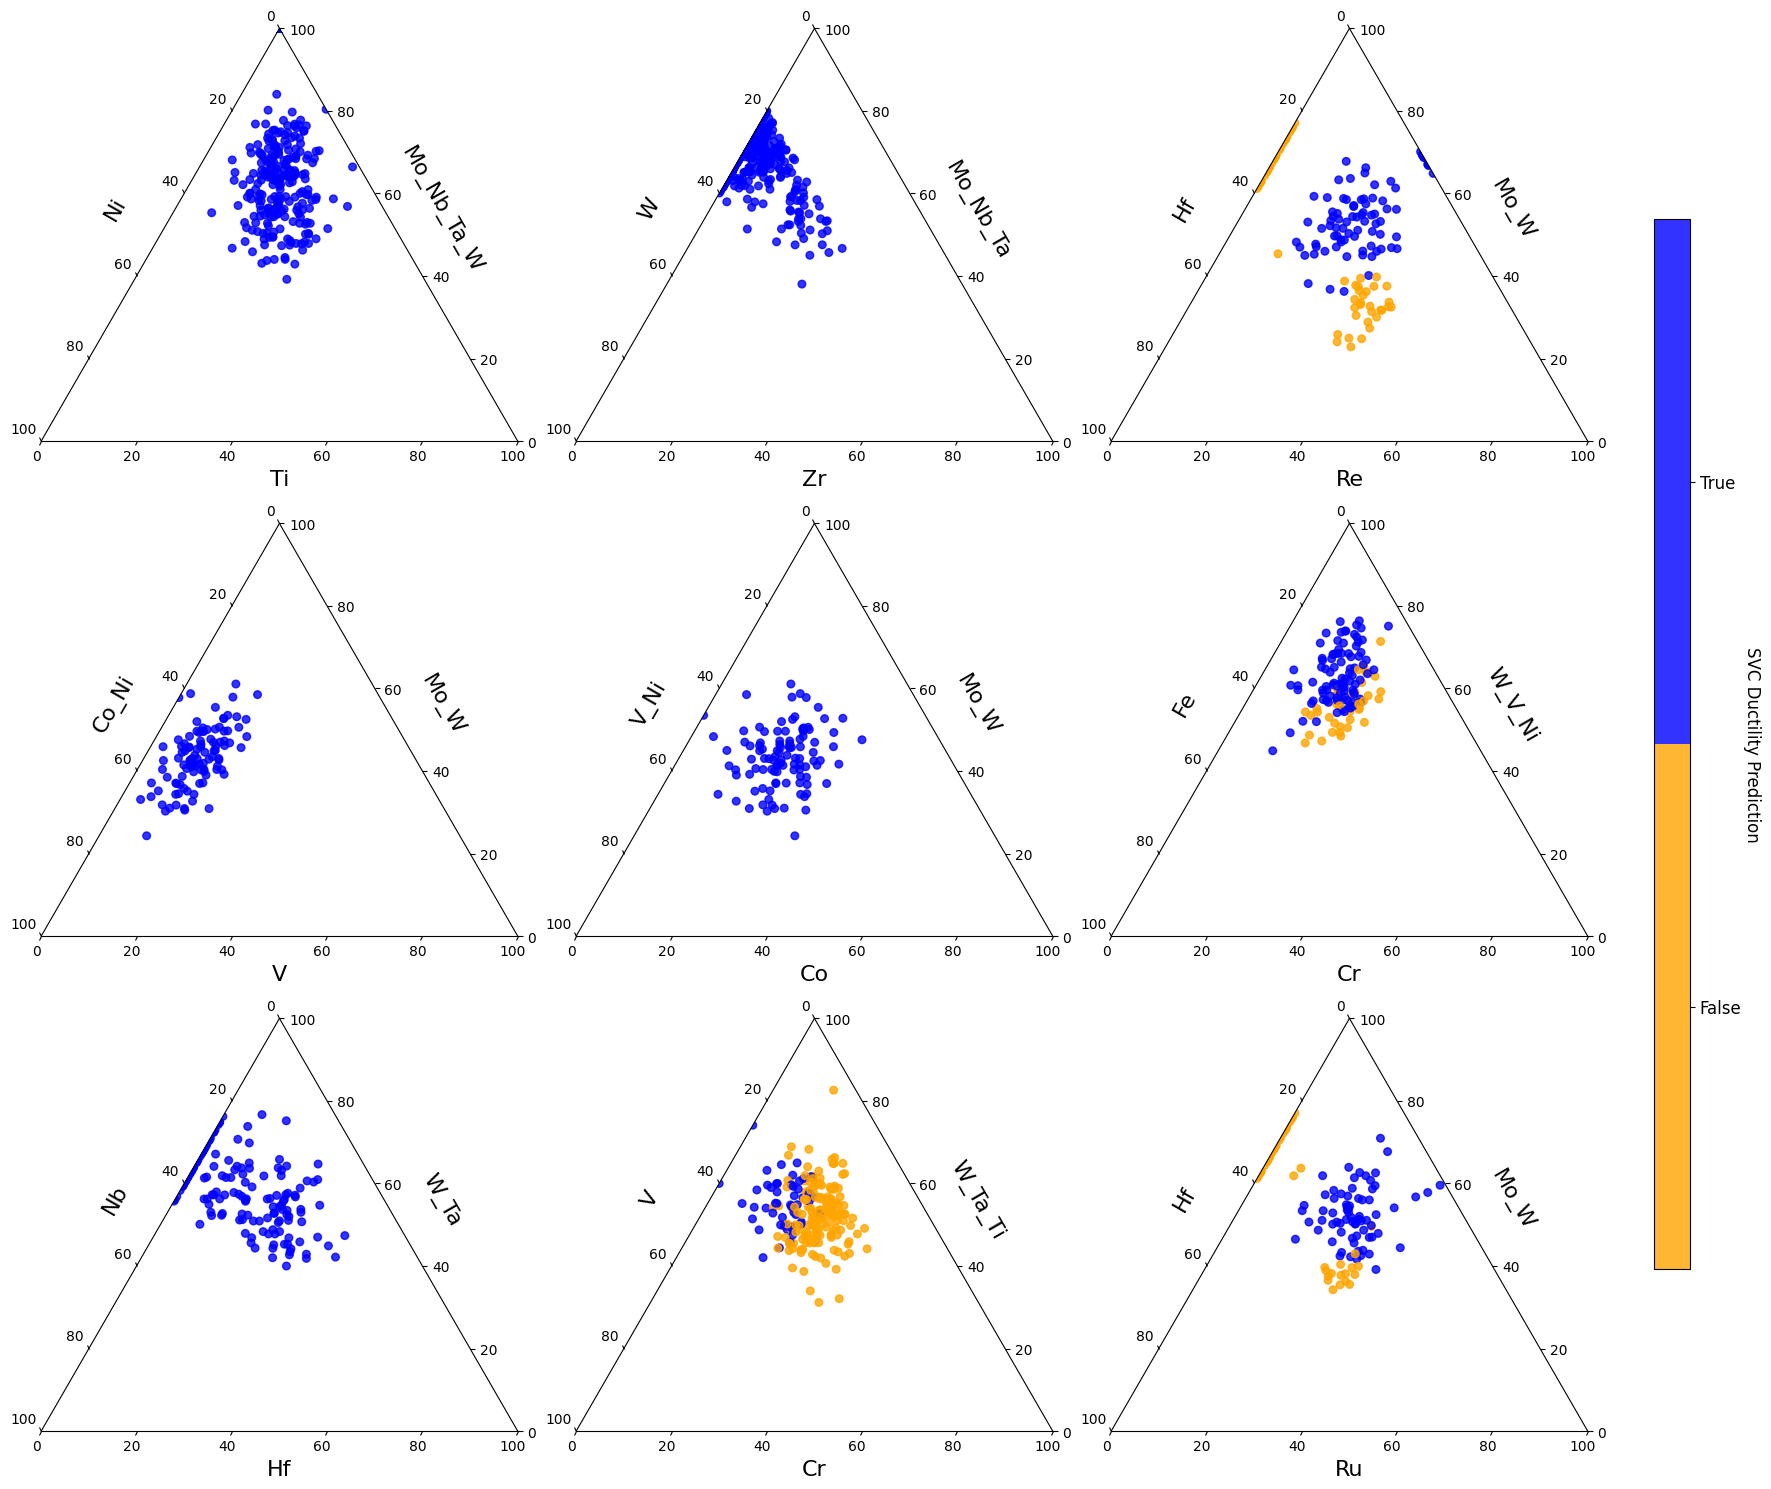

In [121]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mpltern

n_plots = len(ternary_spaces)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig = plt.figure(figsize=(6 * n_cols, 5 * n_rows))

# Define binary colormap (blue=False/0, orange=True/1)
colors = ['orange', 'blue']
cmap = mcolors.ListedColormap(colors)

for i, elements in enumerate(ternary_spaces):
    ax = fig.add_subplot(n_rows, n_cols, i + 1, projection="ternary", ternary_sum=100.0)

    c_space = get_alloy_space(comps, elements)

    t, l, r = c_space[elements[0]], c_space[elements[1]], c_space[elements[2]]
    p = c_space['SVC_prediction']

    pc = ax.scatter(t, l, r, c=p, cmap=cmap, s=30, alpha=0.8, vmin=0, vmax=1)

    for axis, label in zip([ax.taxis, ax.laxis, ax.raxis], elements):
        axis.set_label_text(label, fontsize=16)
        axis.set_label_position('tick1')

    ax.tick_params(labelrotation='horizontal')

cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(pc, cax=cax, label="SVC Ductility Prediction", ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['False', 'True'], fontsize=12)
cbar.set_label("SVC Ductility Prediction", rotation=270, va="baseline", fontsize=12)


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('classification_ternaries_final.png',dpi=600)
plt.show()

## Compositional Box Whisker

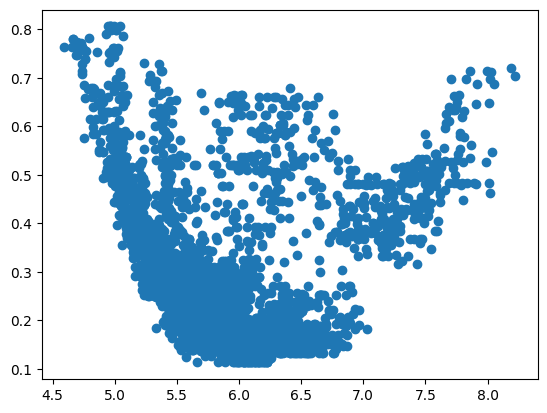

In [88]:
plt.scatter(comps['VEC'], comps['rf_proba'])

In [89]:
def compositional_box_whisker(x_data, y_data, y_name = None,ax=None):
    n_bins = 20
    bins = np.linspace(x_data.min(), x_data.max(), n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_indices = np.digitize(x_data, bins)

    averages, stds, valid_centers = [], [], []
    for i in range(1, len(bins)):
        mask = bin_indices == i
        if mask.sum() > 0:
            averages.append(y_data[mask].mean())
            stds.append(y_data[mask].std())
            valid_centers.append(bin_centers[i-1])

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    ax.errorbar(np.array(valid_centers), np.array(averages), yerr=np.array(stds),
                fmt='o', markersize=8, markerfacecolor='#3498db',
                markeredgecolor='black', markeredgewidth=1.5,
                ecolor='black', elinewidth=2, capsize=5, capthick=2, alpha=0.8)

    ax.set_xlabel(f'Composition of {x_data.name}', fontsize=14, fontweight='bold')
    ax.set_ylabel(y_name, fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_ylim(bottom=y_data.min())
    ax.set_xlim(right=0.4)

    return ax

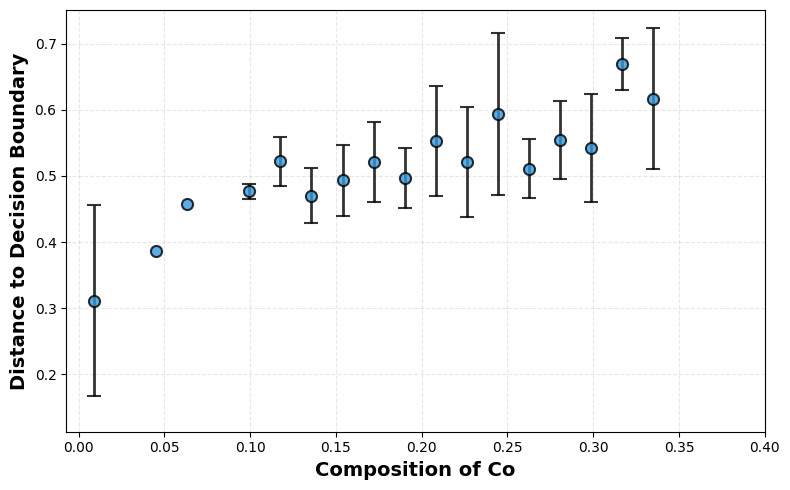

In [90]:
fig, ax = plt.subplots(figsize=(8, 5))
compositional_box_whisker(comps['Co'], comps['rf_proba'], y_name='Distance to Decision Boundary', ax=ax)
plt.tight_layout()
plt.show()

In [91]:
els = ['Ni', 'Ti', 'Zr', 'Re', 'Co', 'Fe', 'Cr', 'Hf', 'V','Ru']

fig, axes = plt.subplots(3, 3, figsize=(14, 10))

for i, (ax, e) in enumerate(zip(axes.flatten(), els)):
    compositional_box_whisker(comps[e], comps['rf_proba'], y_name = 'SVC Decision Function', ax=ax)
    if i % 3 != 0:  # Not leftmost column
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [92]:
comps.iloc[:,0:15].corr()

Mo        Nb        Ta         V         W        Cr        Ti  Al  \
Mo  1.000000 -0.018687 -0.231356 -0.369865 -0.032370 -0.270254 -0.101509 NaN   
Nb -0.018687  1.000000  0.133190 -0.309695 -0.000937 -0.301360  0.072231 NaN   
Ta -0.231356  0.133190  1.000000  0.185195 -0.067232  0.029478 -0.163085 NaN   
V  -0.369865 -0.309695  0.185195  1.000000 -0.064234  0.531640  0.029659 NaN   
W  -0.032370 -0.000937 -0.067232 -0.064234  1.000000 -0.099755 -0.043943 NaN   
Cr -0.270254 -0.301360  0.029478  0.531640 -0.099755  1.000000  0.077107 NaN   
Ti -0.101509  0.072231 -0.163085  0.029659 -0.043943  0.077107  1.000000 NaN   
Al       NaN       NaN       NaN       NaN       NaN       NaN       NaN NaN   
Co  0.078294 -0.192850 -0.183218  0.143763 -0.060521 -0.061123 -0.064619 NaN   
Fe -0.205110 -0.220297 -0.209295  0.167476 -0.099817  0.396540 -0.073815 NaN   
Ni -0.106089 -0.184655 -0.354731  0.104332 -0.079289  0.153918  0.347839 NaN   
Re  0.039806 -0.144471 -0.293650 -0.279502 -0.045690 -0.232597 -0.226778 NaN   
Hf -0.060431 -0.239825 -0.213197 -0.332972  0.016301 -0.277094 -0.228829 NaN   
Zr -0.075830 -0.041777  0.154430  0.159971 -0.063382 -0.094380  0.009959 NaN   
Ru -0.056992 -0.158727 -0.224517 -0.254561 -0.002698 -0.211841 -0.206541 NaN   

          Co        Fe        Ni        Re        Hf        Zr        Ru  
Mo  0.078294 -0.205110 -0.106089  0.039806 -0.060431 -0.075830 -0.056992  
Nb -0.192850 -0.220297 -0.184655 -0.144471 -0.239825 -0.041777 -0.158727  
Ta -0.183218 -0.209295 -0.354731 -0.293650 -0.213197  0.154430 -0.224517  
V   0.143763  0.167476  0.104332 -0.279502 -0.332972  0.159971 -0.254561  
W  -0.060521 -0.099817 -0.079289 -0.045690  0.016301 -0.063382 -0.002698  
Cr -0.061123  0.396540  0.153918 -0.232597 -0.277094 -0.094380 -0.211841  
Ti -0.064619 -0.073815  0.347839 -0.226778 -0.228829  0.009959 -0.206541  
Al       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
Co  1.000000 -0.021479  0.419875 -0.105407 -0.125572 -0.042770 -0.096001  
Fe -0.021479  1.000000  0.508578 -0.120408 -0.143443 -0.048858 -0.109664  
Ni  0.419875  0.508578  1.000000 -0.232038 -0.276427 -0.094153 -0.211331  
Re -0.105407 -0.120408 -0.232038  1.000000  0.253919 -0.150102  0.089673  
Hf -0.125572 -0.143443 -0.276427  0.253919  1.000000 -0.121924  0.229541  
Zr -0.042770 -0.048858 -0.094153 -0.150102 -0.121924  1.000000 -0.136708  
Ru -0.096001 -0.109664 -0.211331  0.089673  0.229541 -0.136708  1.000000

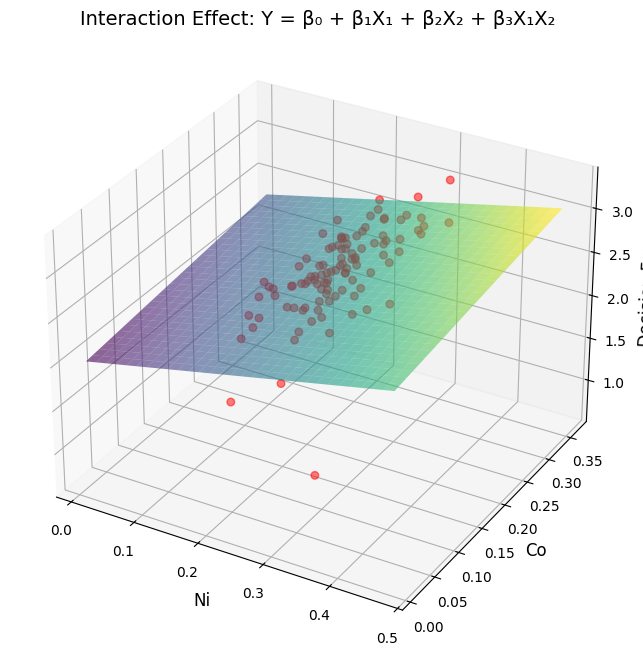

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

e1='Ni'
e2='Co'


x1 = comps[e1].where(comps[e1]>0.01)
x2 = comps[e2].where(comps[e2]>0.01)
y = comps['SVC_decision']

# Grid for surface
x1_grid = np.linspace(0.01, x1.max(), 30)
x2_grid = np.linspace(0.01, x2.max(), 30)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
Y = 2 + 1.5*X1 + 0.8*X2 + 0.3*X1*X2

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, alpha=0.6, cmap='viridis')
ax.scatter(x1, x2, y, c='red', s=30, alpha=0.5)
ax.set_xlabel(e1, fontsize=12)
ax.set_ylabel(e2, fontsize=12)
ax.set_zlabel('Decision Func', fontsize=12)
ax.set_title('Interaction Effect: Y = β₀ + β₁X₁ + β₂X₂ + β₃X₁X₂', fontsize=14)
plt.show()

# Solving for Composition Directly

Use the classification models to create distributions of ROM parameters - solve for composition for samples drawn from those distributions

In [ ]:
import numpy as np

def radius_deviation(x, r):
    """
    Atomic size mismatch parameter δ

    x : array of weights (compositions), should sum to 1
    r : array of atomic radii
    """
    x = np.asarray(x)
    r = np.asarray(r)

    rhat = np.dot(x, r)  # weighted mean radius

    # sum of elementwise products
    return np.sqrt(np.sum(x * (1 - r / rhat) ** 2))

In [ ]:
exp_data = pd.read_csv('/content/RT_ROM.csv')

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds, NonlinearConstraint

element_data = pd.read_csv('/content/total_rom_dataset.csv',index_col=0)
Hmix = pd.read_csv('/content/Hmix.csv',index_col=0)
element_data.drop(['Atomic number'], axis=0, inplace=True)
element_data.drop(['element'], axis=0, inplace=True)
element_data = element_data.astype(float)
element_data.index

Index(['BCC Bulk Modulus', 'r_s', 'rho', 'Atomic radius (pm)',
       'Melting point (K)', 'Boiling point (K)',
       'Pauling electronegativity (-)', 'Allen electronegativity (-)',
       'Valence electron concentration (-)',
       'Itinerant electrons per atom (-)', 'Atomic weight (g/mol)',
       'Density (g/cm3)', 'Molar heat capacity (J/mol K)',
       'Thermal conductivity (W/m/K)', 'shear modulus', 'poissons ratio',
       'youngs modulus', 'bulk modulus'],
      dtype='object')

In [ ]:
def A_matrix(properties, elements, data):
  # Construct the list of property vectors for each element
  matrix_rows = []
  for el in elements:
      element_properties = data.loc[properties, el].to_numpy()
      matrix_rows.append(element_properties)

  # Convert the list of rows to a single NumPy matrix
  A = np.array(matrix_rows)

  # return transposed matrix to get properties in columns
  return A.T

In [ ]:
'''
construction of A matrix and variables for minimize func.
properties = vector of properties to optimize from index of data
A = matrix of properties, columns are an element each
x0 = initial composition vector
lower/upper bounds
'''

properties=['r_s','Melting point (K)']

# get vectors of properties for all of the elements in an alloy
elements = ['Mo', 'Nb', 'Ta', 'W']


bnds = Bounds(0.1, 0.3)

A = A_matrix(properties, elements, element_data)
# check that the matrix has the shape (# of properties, # of elements) so that each column is an element

# set the lower and upper fraction limits of any of the elements you want (i.e.)
#lower_bounds = {'W':0.1,'Nb':0.4}
#upper_bounds = {'Mo':0.3,'Nb':0.45}

# get the number of elements being optimized on
n = A.shape[1]

# initial equiatomic alloy -- can use existing alloy and fewer steps to optimize it (LATER)
x0 = np.ones(n)/n

In [ ]:
data[elements].loc[['shear modulus','bulk modulus']]


Mo     Nb     Ta      W
shear modulus   20.0   38.0   67.0  161.0
bulk modulus   230.0  170.0  200.0  310.0

In [ ]:
data[elements].loc['shear modulus']/data[elements].loc['bulk modulus']

Mo    0.086957
Nb    0.223529
Ta    0.335000
W     0.519355
dtype: float64

In [ ]:
'''
construction of A matrix and variables for minimize func.
properties = vector of properties to optimize from index of data
A = matrix of properties, columns are an element each
b = target vector of properties of interest - optimizes towards that
x0 = initial composition vector
composition = sum to 1
'''

properties=['r_s','Melting point (K)']
b = [1.8, 3230]

# get vectors of properties for all of the elements in an alloy
elements = ['Mo', 'Nb', 'Ta', 'W','Ti','V','Zr']

A = A_matrix(properties, elements, data)
# check that the matrix has the shape (# of properties, # of elements) so that each column is an element

# get the number of elements being optimized on
n = A.shape[1]

# initial equiatomic alloy -- can use existing alloy and fewer steps to optimize it
x0 = np.ones(n)/n


# sum of composition vector has to be 1, and each entry has to be between 0 and 1
composition_constraint = LinearConstraint(np.ones((1,n)), 1.0, 1.0)

#bnds = construct_composition_bounds(lower_bounds,upper_bounds,elements)
bnds = Bounds(0.05, 0.3)


In [ ]:
# objective function is the squared distance between current property vector (Ax) and a target (b)
# minimize objective function given the MC1 and composition constraints

obj = lambda z: np.linalg.norm(A @ z - b)**2
res = minimize(obj, x0, method="SLSQP", constraints=[composition_constraint],
               bounds = bnds,
               options={"ftol":1e-20, "maxiter":10000})
x = res.x

print(f'elements: {elements}')
print(f'composition: {x}')
print(f'total comp: {np.sum(x)}')
print(f'result: {A@x})')
print(f'target: {b}')


/usr/local/lib/python3.12/dist-packages/scipy/optimize/_constraints.py:530: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:n_bound_below] = y_all[i_bound_below] - lb[i_bound_below]
/usr/local/lib/python3.12/dist-packages/scipy/optimize/_constraints.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  y[n_bound_below:] = -(y_all[i_bound_above] - ub[i_bound_above])


elements: ['Mo', 'Nb', 'Ta', 'W', 'Ti', 'V', 'Zr']
composition: [0.27566876 0.05       0.26536876 0.3        0.05       0.05
 0.05      ]
total comp: 1.0410375182705587
result: [1.91020599e+00 3.22999995e+03])
target: [1.8, 3230]


In [ ]:
import json

optimized = res.x
optimized = optimized*100

output = {el: val for el, val in zip(elements, optimized)}

with open('optimized.json', 'w') as f:
    json.dump(output, f)

In [13]:
import pandas as pd

df1 = pd.read_csv('/content/WHEA_ROM_parameters.csv')
df2 = pd.read_csv('/content/WHEA_RT_ductility.csv')



In [8]:
com = pd.merge(df2[['composition','compressive strain (%)','elongation (%)']],df1,on='composition')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  140 non-null    int64  
 1   composition                 140 non-null    object 
 2   phases                      59 non-null     object 
 3   hardness (HV)               82 non-null     float64
 4   temperature (C)             140 non-null    float64
 5   compressive ys (MPa)        66 non-null     float64
 6   compressive strength (MPa)  62 non-null     float64
 7   compressive strain (%)      106 non-null    float64
 8   doi                         140 non-null    object 
 9   ys (MPa)                    10 non-null     float64
 10  uts (MPa)                   11 non-null     float64
 11  elongation (%)              11 non-null     float64
 12  pmg_comp                    140 non-null    object 
 13  is_ductile                  117 non

In [10]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   composition                91 non-null     object 
 1   compressive strain (%)     80 non-null     float64
 2   elongation (%)             10 non-null     float64
 3   Unnamed: 0                 91 non-null     int64  
 4   is_ductile                 91 non-null     bool   
 5   Mo                         91 non-null     float64
 6   Nb                         91 non-null     float64
 7   Ta                         91 non-null     float64
 8   V                          91 non-null     float64
 9   W                          91 non-null     float64
 10  Cr                         91 non-null     float64
 11  Ti                         91 non-null     float64
 12  Al                         91 non-null     float64
 13  Co                         91 non-null     float64
 

In [16]:
com = com[com['compressive strain (%)'].notna()]

In [18]:
com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 90
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   composition                80 non-null     object 
 1   compressive strain (%)     80 non-null     float64
 2   elongation (%)             0 non-null      float64
 3   Unnamed: 0                 80 non-null     int64  
 4   is_ductile                 80 non-null     bool   
 5   Mo                         80 non-null     float64
 6   Nb                         80 non-null     float64
 7   Ta                         80 non-null     float64
 8   V                          80 non-null     float64
 9   W                          80 non-null     float64
 10  Cr                         80 non-null     float64
 11  Ti                         80 non-null     float64
 12  Al                         80 non-null     float64
 13  Co                         80 non-null     float64
 14  F

In [19]:
X = com.iloc[:,20:40]
y = com['compressive strain (%)']

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(oob_score=True)

rf.fit(X,y)



RandomForestRegressor(oob_score=True)